##Análisis exploratorio para distintas medidas de efecto Zeeman

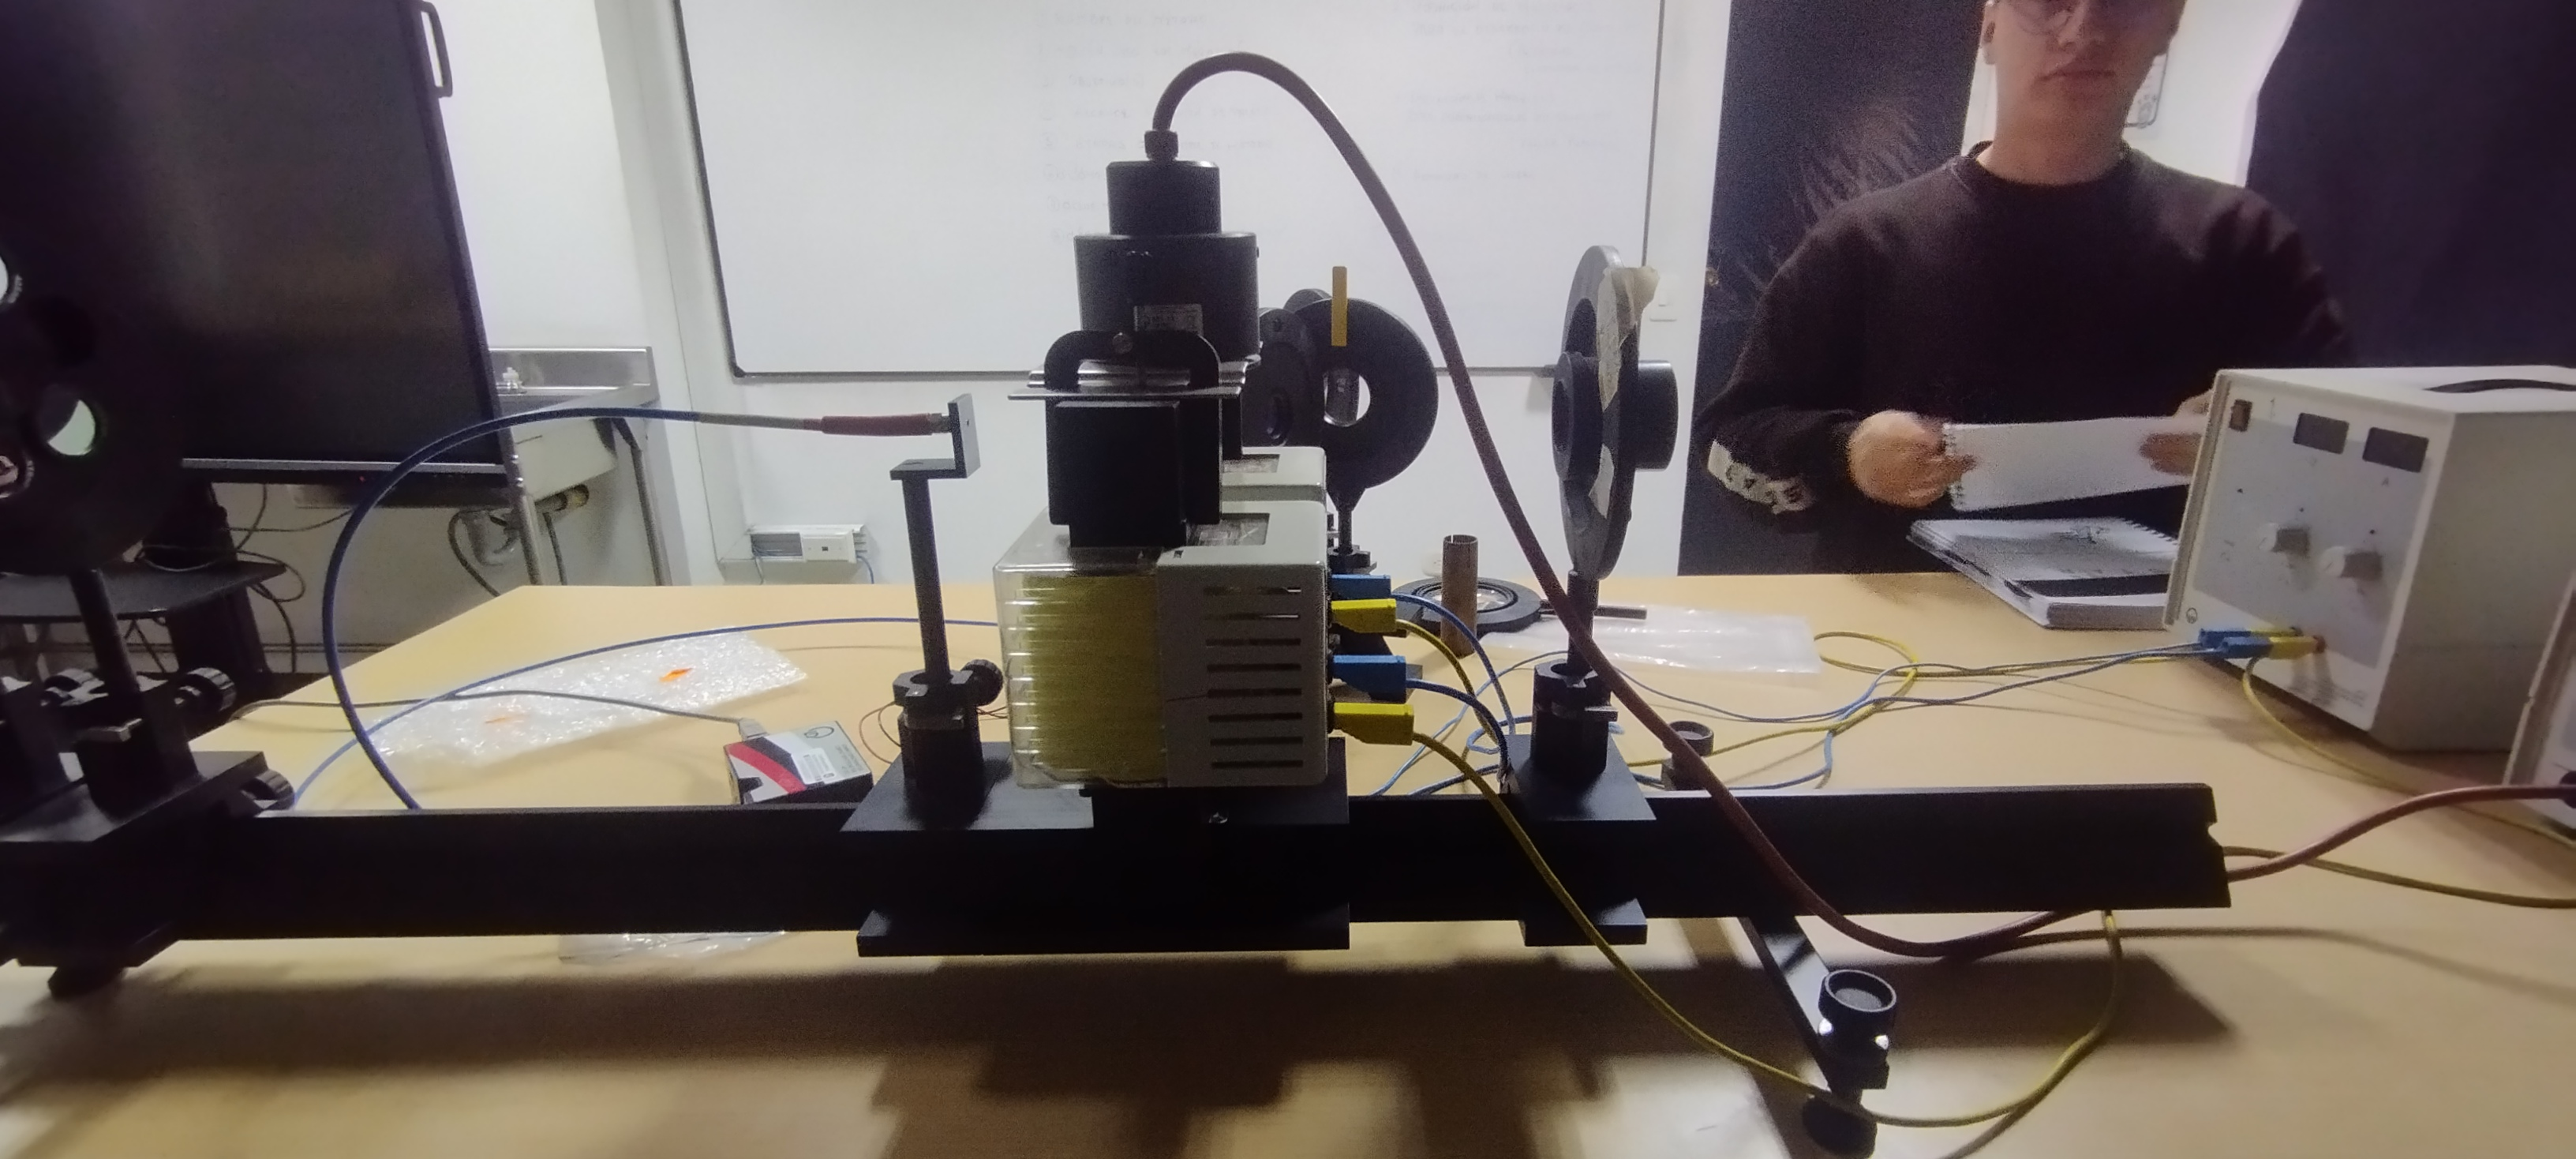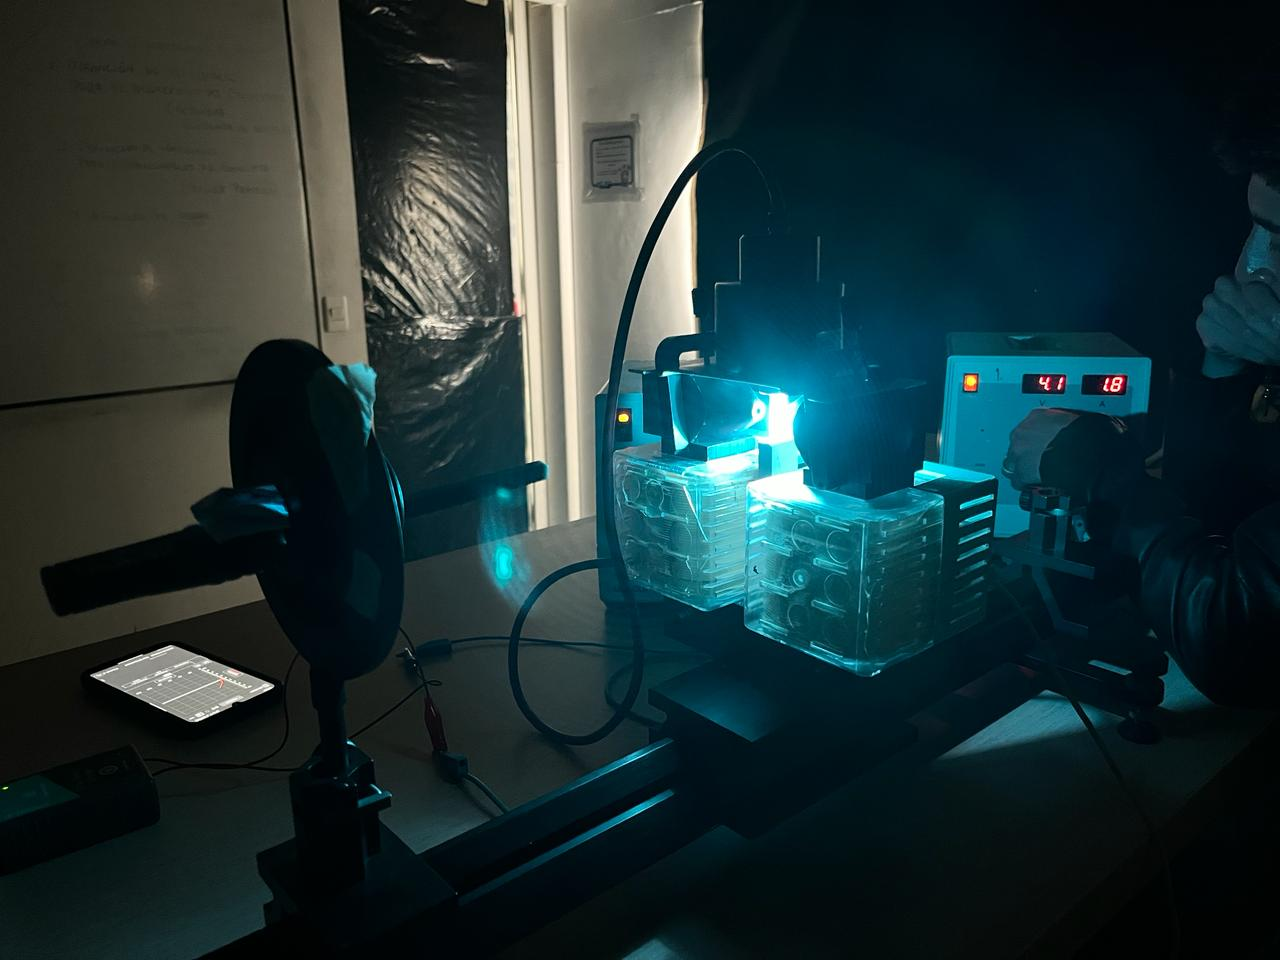

###Librerias

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from google.colab import drive
drive.mount('/content/drive')

###Lectura de dataframes

In [ ]:
df_01 = pd.read_csv('/content/drive/MyDrive/Mineria_de_datos_equipo/Parcial1_EfectoZeeman/csv1.csv')
df_02 = pd.read_csv('/content/drive/MyDrive/Mineria_de_datos_equipo/Parcial1_EfectoZeeman/csv2.csv')
df_03 = pd.read_csv('/content/drive/MyDrive/Mineria_de_datos_equipo/Parcial1_EfectoZeeman/csv3.csv')
df_04 = pd.read_csv('/content/drive/MyDrive/Mineria_de_datos_equipo/Parcial1_EfectoZeeman/csv4.csv')

###Reestructuracion de los dataframes

In [ ]:
df_01.columns

Index(['Datos 1:Tiempo(s)', 'Datos 1:Potencial(V)',
       'Datos 1:Campo magnético X(mT)', 'Datos 1:Luminancia(lux)',
       'Datos 1:Campo magnético Y(mT)', 'Datos 1:Campo magnético Z(mT)',
       'Datos 1:Intensidad UV', 'Datos 1:615 nm', 'Datos 1:525 nm',
       'Datos 1:465 nm'],
      dtype='object')

In [ ]:
# Definir el diccionario de mapeo para cambiar los nombres de las columnas
nombres_nuevos = {
    'Datos 1:Tiempo(s)': 'Tiempo(s)', 'Datos 1:Potencial(V)':'Potencial(V)',
       'Datos 1:Campo magnético X(mT)':'Campo magnético X(mT)', 'Datos 1:Campo magnético Y(mT)':'Campo magnético Y(mT)',
       'Datos 1:Campo magnético Z(mT)':'Campo magnético Z(mT)', 'Datos 1:Luminancia(lux)':'Luminancia(lux)',
       'Datos 1:Intensidad UV':'Intensidad UV', 'Datos 1:615 nm':'Intensidad 615 nm', 'Datos 1:525 nm':'Intensidad 525 nm',
       'Datos 1:465 nm':'Intensidad 465 nm'
}

# Cambiar los nombres de las columnas
df_01 = df_01.rename(columns=nombres_nuevos)
df_02 = df_02.rename(columns=nombres_nuevos)
df_03 = df_03.rename(columns=nombres_nuevos)
df_04 = df_04.rename(columns=nombres_nuevos)

In [ ]:
# Cambiar el orden de columnas en df_01 y df_02
df_01 = df_01[['Tiempo(s)', 'Potencial(V)', 'Campo magnético X(mT)', 'Campo magnético Y(mT)', 'Campo magnético Z(mT)', 'Luminancia(lux)', 'Intensidad UV', 'Intensidad 615 nm', 'Intensidad 525 nm', 'Intensidad 465 nm']]
df_02 = df_02[['Tiempo(s)', 'Potencial(V)', 'Campo magnético X(mT)', 'Campo magnético Y(mT)', 'Campo magnético Z(mT)', 'Luminancia(lux)', 'Intensidad UV', 'Intensidad 615 nm', 'Intensidad 525 nm', 'Intensidad 465 nm']]
df_01

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00     -0.009556              -0.032917               0.027225   
1          0.05     -0.010973              -0.027817               0.028125   
2          0.10     -0.010265              -0.025267               0.026325   
3          0.15     -0.010973              -0.033067               0.028275   
4          0.20     -0.010265              -0.014017               0.027375   
...         ...           ...                    ...                    ...   
2396     119.80      8.729351              -1.227818               0.003375   
2397     119.85      8.729351              -1.228418               0.003825   
2398     119.90      8.729351              -1.226918               0.004275   
2399     119.95      8.729351              -1.224518               0.006075   
2400     120.00      8.729351              -1.227068               0.003825   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad UV  \
0                 -0.010810        14.518775              0   
1                 -0.016960        14.518775              0   
2                 -0.028210        14.518775              0   
3                 -0.025510        14.518775              0   
4                 -0.025360        14.518775              0   
...                     ...              ...            ...   
2396              -1.073861        30.429762              0   
2397              -1.076411        30.429762              0   
2398              -1.077161        30.429762              0   
2399              -1.077610        30.429762              0   
2400              -1.076261        30.628649              0   

      Intensidad 615 nm  Intensidad 525 nm  Intensidad 465 nm  
0                     0           1.803231           9.229990  
1                     0           1.803231           9.229990  
2                     0           1.803231           9.229990  
3                     0           1.803231           9.229990  
4                     0           1.803231           9.229990  
...                 ...                ...                ...  
2396                  0           4.508079          20.767477  
2397                  0           4.508079          20.767477  
2398                  0           5.049048          22.151978  
2399                  0           5.049048          22.151978  
2400                  0           5.229371          20.305979  

[2401 rows x 10 columns]

In [ ]:
df_02

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00     -0.009556              -0.032917               0.027225   
1          0.05     -0.010973              -0.027817               0.028125   
2          0.10     -0.010265              -0.025267               0.026325   
3          0.15     -0.010973              -0.033067               0.028275   
4          0.20     -0.010265              -0.014017               0.027375   
...         ...           ...                    ...                    ...   
2396     119.80      8.729351              -1.227818               0.003375   
2397     119.85      8.729351              -1.228418               0.003825   
2398     119.90      8.729351              -1.226918               0.004275   
2399     119.95      8.729351              -1.224518               0.006075   
2400     120.00      8.729351              -1.227068               0.003825   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad UV  \
0                 -0.010810        14.518775              0   
1                 -0.016960        14.518775              0   
2                 -0.028210        14.518775              0   
3                 -0.025510        14.518775              0   
4                 -0.025360        14.518775              0   
...                     ...              ...            ...   
2396              -1.073861        30.429762              0   
2397              -1.076411        30.429762              0   
2398              -1.077161        30.429762              0   
2399              -1.077610        30.429762              0   
2400              -1.076261        30.628649              0   

      Intensidad 615 nm  Intensidad 525 nm  Intensidad 465 nm  
0                     0           1.803231           9.229990  
1                     0           1.803231           9.229990  
2                     0           1.803231           9.229990  
3                     0           1.803231           9.229990  
4                     0           1.803231           9.229990  
...                 ...                ...                ...  
2396                  0           4.508079          20.767477  
2397                  0           4.508079          20.767477  
2398                  0           5.049048          22.151978  
2399                  0           5.049048          22.151978  
2400                  0           5.229371          20.305979  

[2401 rows x 10 columns]

In [ ]:
df_03

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00      0.015263              -0.023017               0.004725   
1          0.05      0.013845              -0.019567              -0.001725   
2          0.10      0.013845              -0.019567              -0.001425   
3          0.15      0.014553              -0.019867              -0.000975   
4          0.20      0.015263              -0.025267               0.005625   
...         ...           ...                    ...                    ...   
2396     119.80     14.634003              -2.494567              -0.655575   
2397     119.85     14.634708              -2.498917              -0.653925   
2398     119.90     14.634003              -2.491567              -0.651525   
2399     119.95     14.634003              -2.486017              -0.650175   
2400     120.00     14.634003              -2.495018              -0.649125   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad UV  \
0                  0.018440        37.191933              0   
1                  0.019040        37.390820              0   
2                  0.019490        37.390820              0   
3                  0.018440        37.390820              0   
4                  0.018290        37.390820              0   
...                     ...              ...            ...   
2396               2.532740        39.976353              0   
2397               2.545940        39.976353              0   
2398               2.551039        39.976353              0   
2399               2.513390        39.976353              0   
2400               2.540689        39.976353              0   

      Intensidad 615 nm  Intensidad 525 nm  Intensidad 465 nm  
0                     0           6.491633          28.151468  
1                     0           6.491633          28.151468  
2                     0           6.671956          28.612968  
3                     0           6.671956          28.612968  
4                     0           6.671956          28.612968  
...                 ...                ...                ...  
2396                  0           6.852280          31.381968  
2397                  0           6.852280          31.381968  
2398                  0           7.032602          29.535969  
2399                  0           7.032602          29.535969  
2400                  0           6.852280          31.381968  

[2401 rows x 10 columns]

In [ ]:
df_04

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00     -0.006720              -0.021817               0.031425   
1          0.05     -0.006010              -0.021667               0.030975   
2          0.10     -0.006720              -0.021067               0.031125   
3          0.15     -0.007429              -0.021367               0.030975   
4          0.20     -0.007429              -0.021217               0.031425   
...         ...           ...                    ...                    ...   
2396     119.80     14.963730              -1.580768               0.491625   
2397     119.85     14.964439              -1.576718               0.491775   
2398     119.90     14.965858              -1.579718               0.491775   
2399     119.95     14.965149              -1.579268               0.491325   
2400     120.00     14.965149              -1.577468               0.491025   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad UV  \
0                   0.01094        24.463142              0   
1                   0.00944        24.264256              0   
2                   0.00899        24.264256              0   
3                   0.00884        24.264256              0   
4                   0.00929        24.264256              0   
...                     ...              ...            ...   
2396                2.37224        25.855352              0   
2397                2.36894        25.656466              0   
2398                2.36954        25.656466              0   
2399                2.37029        25.656466              0   
2400                2.36819        25.656466              0   

      Intensidad 615 nm  Intensidad 525 nm  Intensidad 465 nm  
0                     0           3.967109          17.075481  
1                     0           3.967109          17.075481  
2                     0           3.967109          17.075481  
3                     0           3.967109          17.075481  
4                     0           3.786786          18.921478  
...                 ...                ...                ...  
2396                  0           3.786786          18.921478  
2397                  0           3.786786          18.921478  
2398                  0           3.786786          18.921478  
2399                  0           3.786786          18.921478  
2400                  0           4.327755          20.305979  

[2401 rows x 10 columns]

###Analisis exploratorio al dataframe df_01

In [ ]:
# Usamos el atributo shape para observar el tamaño del dataset.
df_01.shape

(2401, 10)

In [ ]:
# Usamos el método info() para obtener información de las columnas del dataset.
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el método unique() sobre la columna deseada para verificar cúales son los valores únicos.
print(df_01['Intensidad UV'].unique())
print(df_01['Intensidad 615 nm'].unique())

[0]
[0]


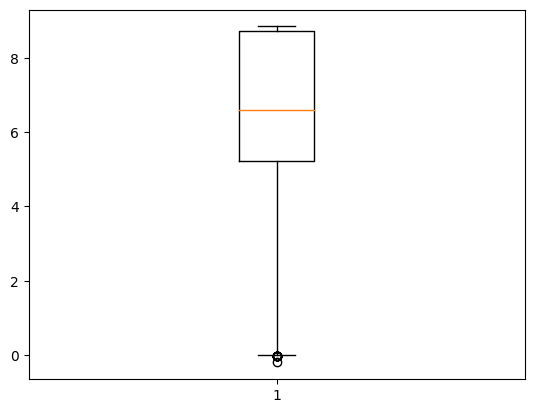

In [ ]:
potential = df_01['Potencial(V)']
plt.boxplot([potential])
plt.show()

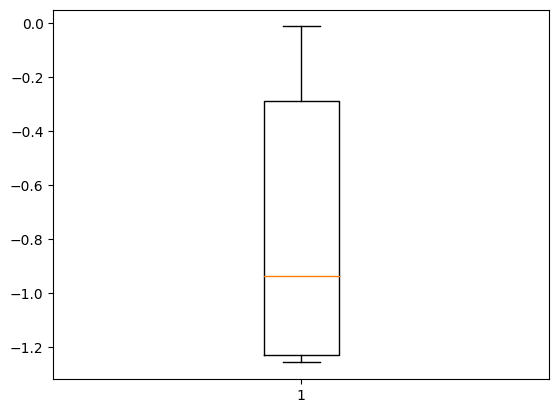

In [ ]:
MX = df_01['Campo magnético X(mT)']
plt.boxplot([MX])
plt.show()

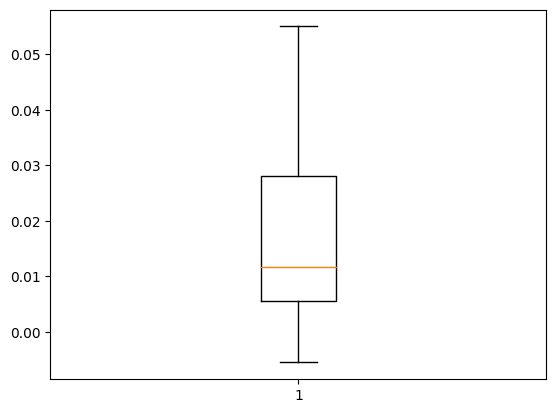

In [ ]:
MY = df_01['Campo magnético Y(mT)']
plt.boxplot([MY])
plt.show()

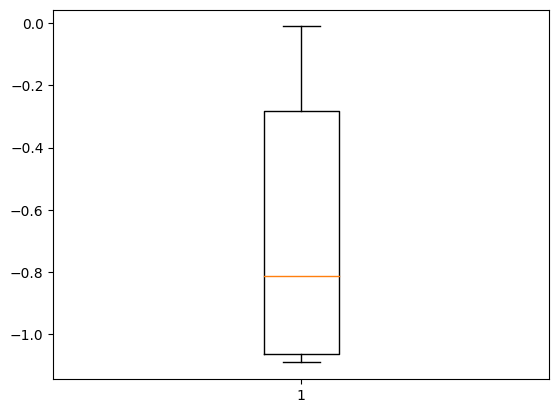

In [ ]:
MZ = df_01['Campo magnético Z(mT)']
plt.boxplot([MZ])
plt.show()

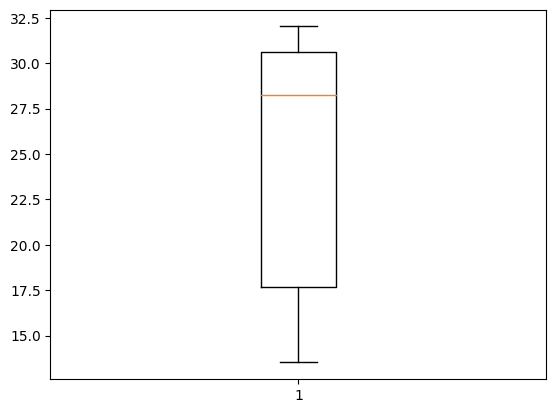

In [ ]:
L = df_01['Luminancia(lux)']
plt.boxplot([L])
plt.show()

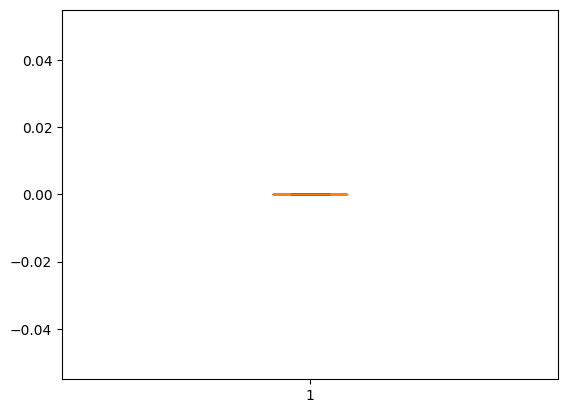

In [ ]:
UV = df_01['Intensidad UV']
plt.boxplot([UV])
plt.show()

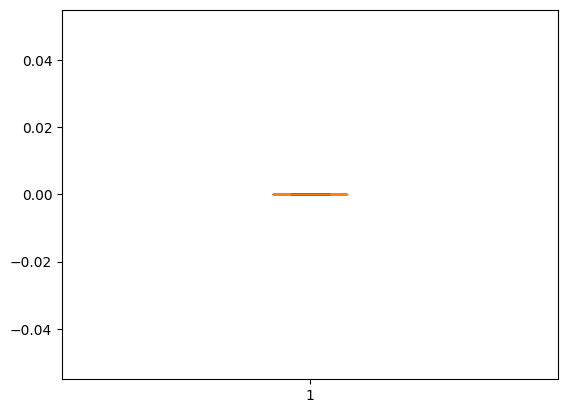

In [ ]:
I1 = df_01['Intensidad 615 nm']
plt.boxplot([I1])
plt.show()

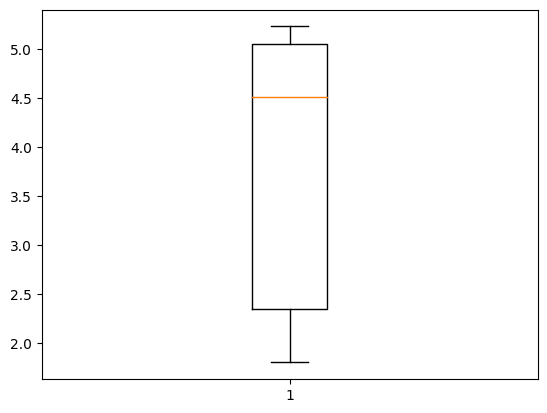

In [ ]:
I2 = df_01['Intensidad 525 nm']
plt.boxplot([I2])
plt.show()

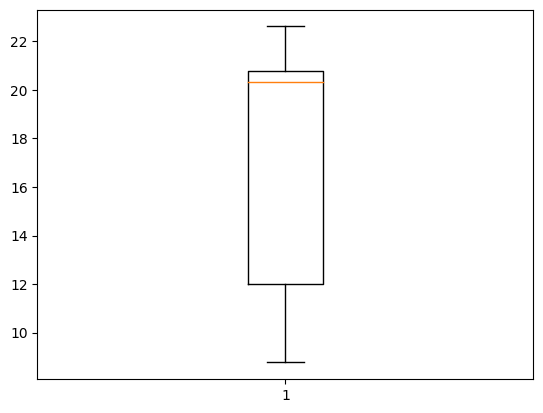

In [ ]:
I3 = df_01['Intensidad 465 nm']
plt.boxplot([I3])
plt.show()

Como los data frames tienen valores cero en las columnas $\mathrm{UV}$ y $615\mathrm{nm}$, pueden ser eliminados ya que no aportan información alguna y como se va a ver más adelante, no tienen correlacion alguna con las demás características.

In [ ]:
df_01C = df_01.drop(columns=['Intensidad UV', 'Intensidad 615 nm'])
df_01C

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00     -0.009556              -0.032917               0.027225   
1          0.05     -0.010973              -0.027817               0.028125   
2          0.10     -0.010265              -0.025267               0.026325   
3          0.15     -0.010973              -0.033067               0.028275   
4          0.20     -0.010265              -0.014017               0.027375   
...         ...           ...                    ...                    ...   
2396     119.80      8.729351              -1.227818               0.003375   
2397     119.85      8.729351              -1.228418               0.003825   
2398     119.90      8.729351              -1.226918               0.004275   
2399     119.95      8.729351              -1.224518               0.006075   
2400     120.00      8.729351              -1.227068               0.003825   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad 525 nm  \
0                 -0.010810        14.518775           1.803231   
1                 -0.016960        14.518775           1.803231   
2                 -0.028210        14.518775           1.803231   
3                 -0.025510        14.518775           1.803231   
4                 -0.025360        14.518775           1.803231   
...                     ...              ...                ...   
2396              -1.073861        30.429762           4.508079   
2397              -1.076411        30.429762           4.508079   
2398              -1.077161        30.429762           5.049048   
2399              -1.077610        30.429762           5.049048   
2400              -1.076261        30.628649           5.229371   

      Intensidad 465 nm  
0              9.229990  
1              9.229990  
2              9.229990  
3              9.229990  
4              9.229990  
...                 ...  
2396          20.767477  
2397          20.767477  
2398          22.151978  
2399          22.151978  
2400          20.305979  

[2401 rows x 8 columns]

In [ ]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
df_01C.describe()

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  \
count  2401.000000   2401.000000            2401.000000   
mean     60.000000      6.601657              -0.773525   
std      34.662666      2.083476               0.427609   
min       0.000000     -0.198175              -1.257968   
25%      30.000000      5.232088              -1.229318   
50%      60.000000      6.592134              -0.936217   
75%      90.000000      8.727226              -0.288817   
max     120.000000      8.839973              -0.013867   

       Campo magnético Y(mT)  Campo magnético Z(mT)  Luminancia(lux)  \
count            2401.000000            2401.000000      2401.000000   
mean                0.016762              -0.684726        24.707009   
std                 0.012720               0.358382         6.559007   
min                -0.005475              -1.090811        13.524339   
25%                 0.005625              -1.063511        17.700974   
50%                 0.011775              -0.812861        28.242001   
75%                 0.028125              -0.283060        30.628649   
max                 0.054975              -0.010360        32.020859   

       Intensidad 525 nm  Intensidad 465 nm  
count        2401.000000        2401.000000  
mean            3.874206          17.154865  
std             1.233862           4.842117  
min             1.803231           8.768491  
25%             2.344201          11.998986  
50%             4.508079          20.305979  
75%             5.049048          20.767477  
max             5.229371          22.613476

###Análisis de correlación y regresiones a df_01

<Axes: >

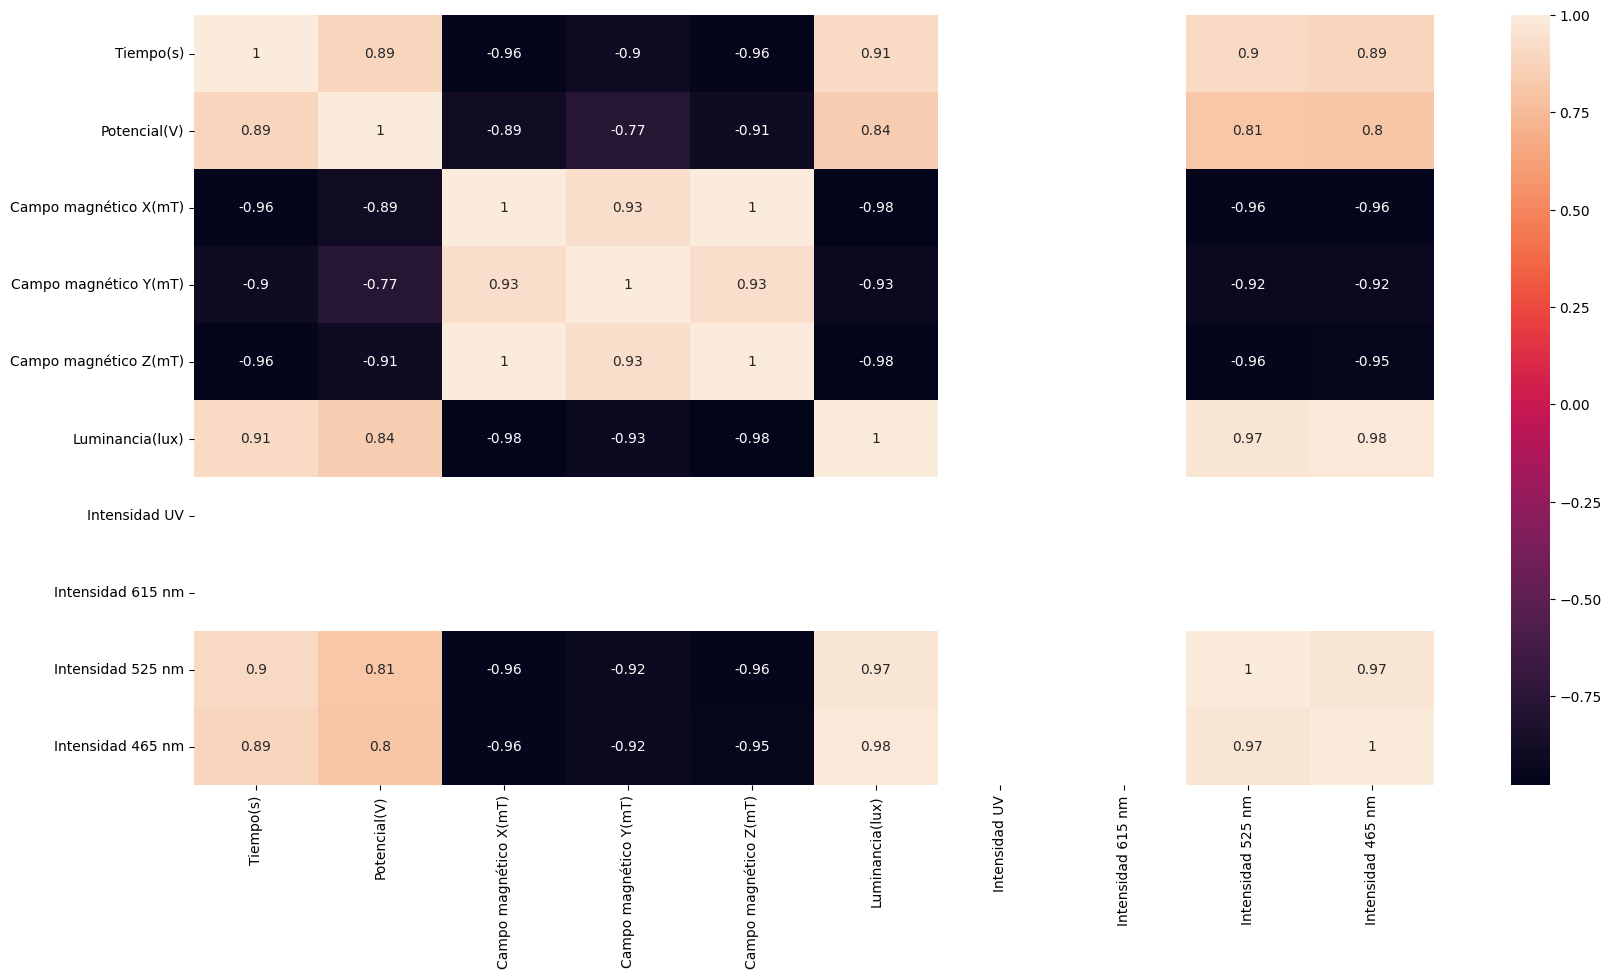

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_01.corr(),  annot=True)

Como se mencionó, al menos para la matriz de correlaciones se muestra que los datos de intensidad en el ultra violeta y la intensidad de $615\mathrm{nm}$ no aporta peso con los demás datos y tampoco registra datos relevantes de interés.

<Axes: >

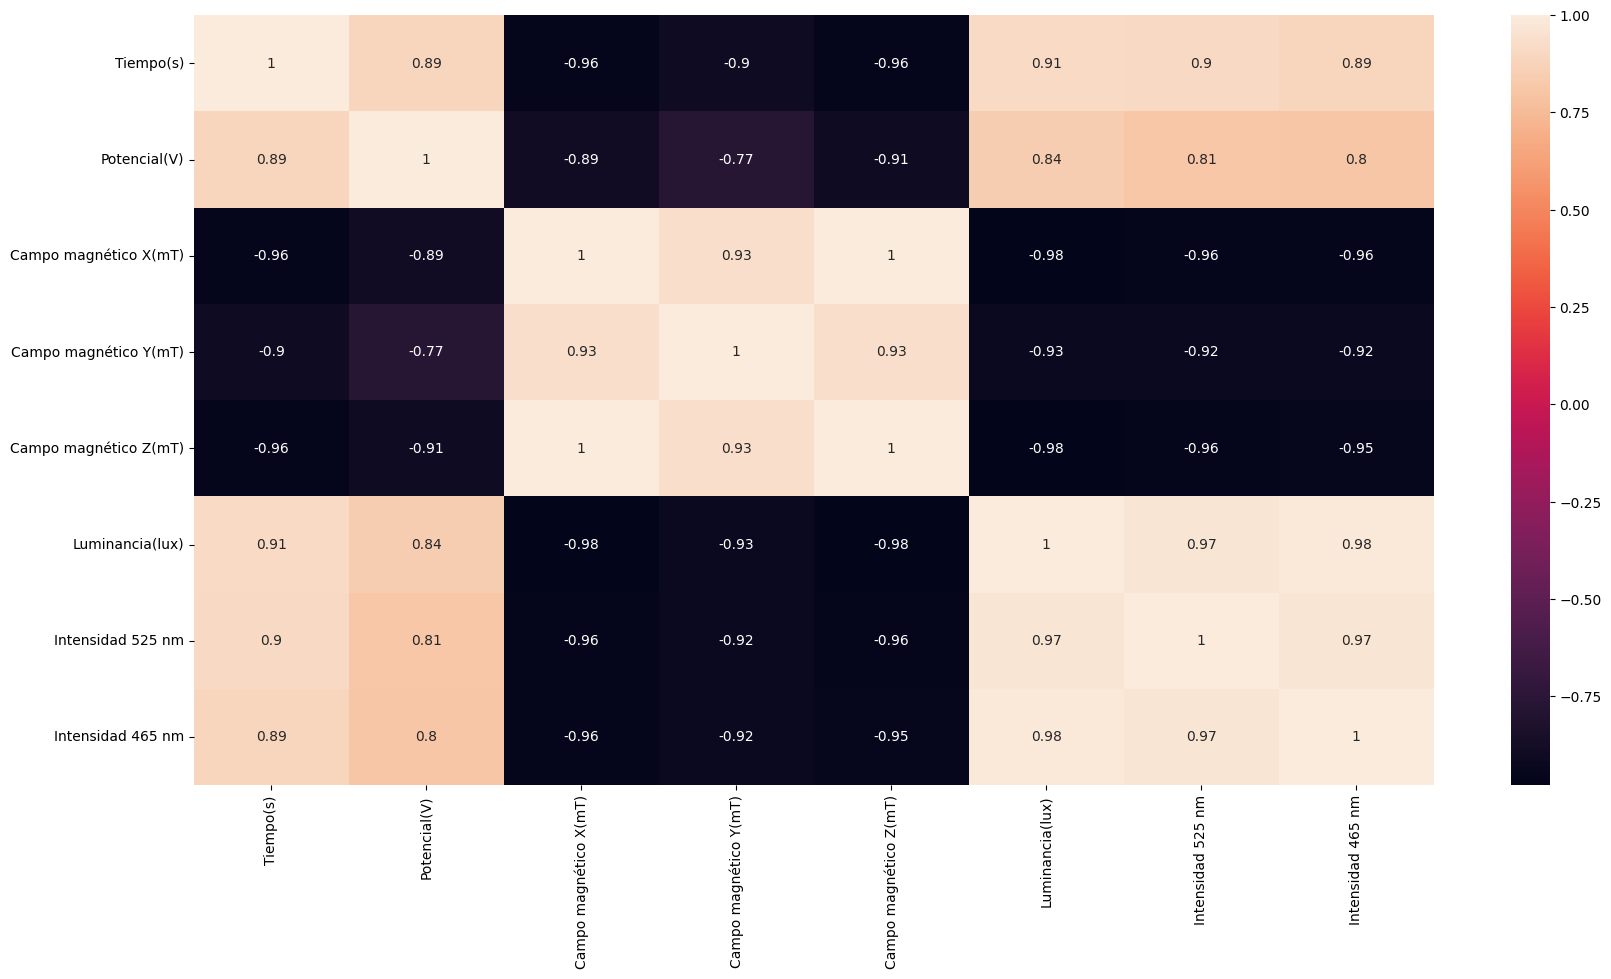

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_01C.corr(), annot=True)

Vamos a realizar un modelo de regresion lineal tanto univariable como multivariable con los diversos datos que nos hayan mostrado un alto valor de correlación.

Coeficiente omega:  -0.06370312762177836
Coeficiente intercepto:  0.799953276274903
Error medio cuadrado:
0.00879687799742093
0.9517320129811506


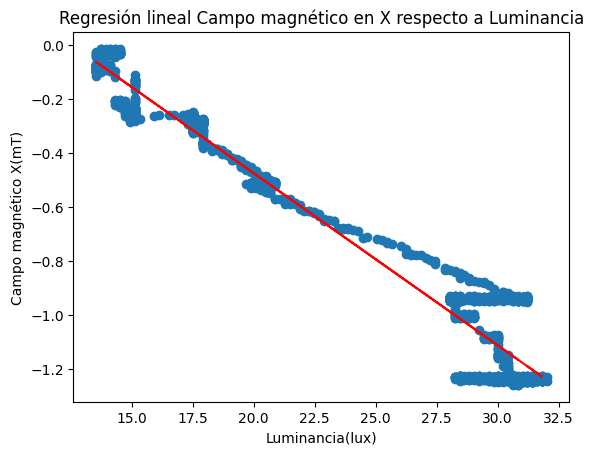

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)
print (u'Coeficiente omega: ', model.coef_[0])
print (u'Coeficiente intercepto: ', model.intercept_)


# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
0.007868541645719842
Coeficiente de determinación (R^2):
0.9569491018795964


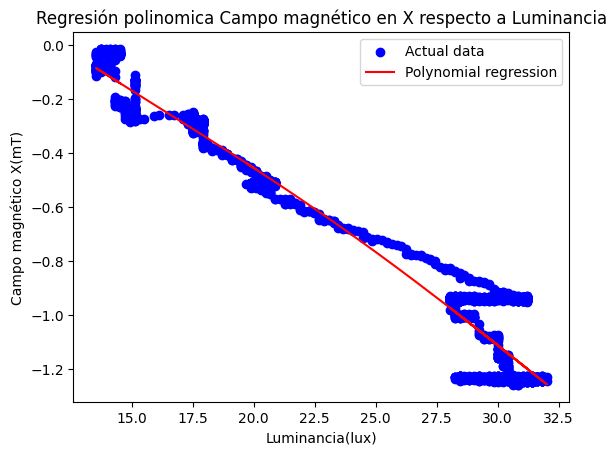

In [ ]:
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético X(mT)']
X = X.values.reshape(-1, 1)

degree = 4

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomica Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Para hacer una comparación entre la regresión lineal que usa scikit-learn se realiza la regresión lineal de forma manual

Pendiente:  -0.03350047846256411


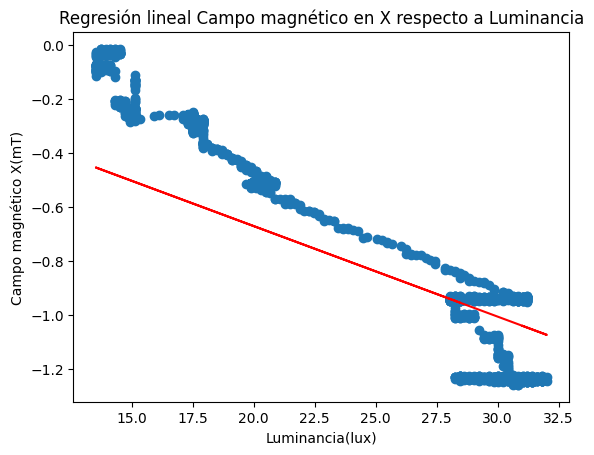

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train)

w=np.sum(X_train*Y_train)/np.sum(X_train**2)
print("Pendiente: ", w)

#Dibujando la recta
b=0
y= w * X_train + b
plt.plot(X_train, y, color="red", label="Regresión lineal")


Regresión lineal con offset

Error medio cuadrático: [[0.00781781]]
Pendiente:  -0.06370312762177932
Intercepto:  0.7999532762749251


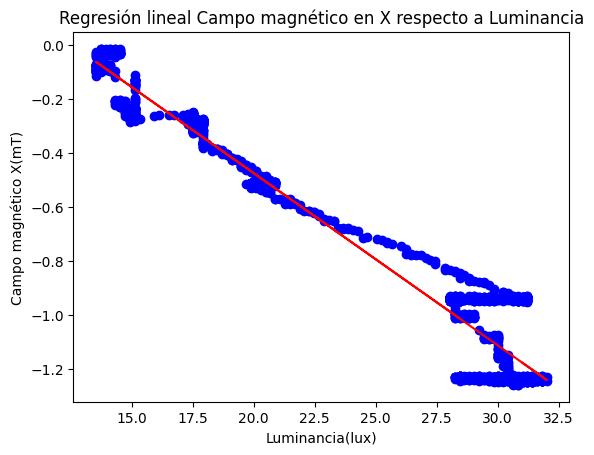

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])


Error medio cuadrado:
2.324187760538981e-05
0.8561434437826633


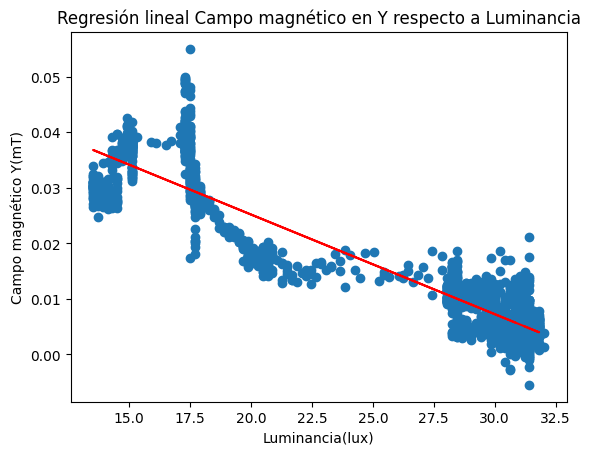

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en Y respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Y(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
1.2194763379525287e-05
Coeficiente de determinación (R^2):
0.9245995790816078


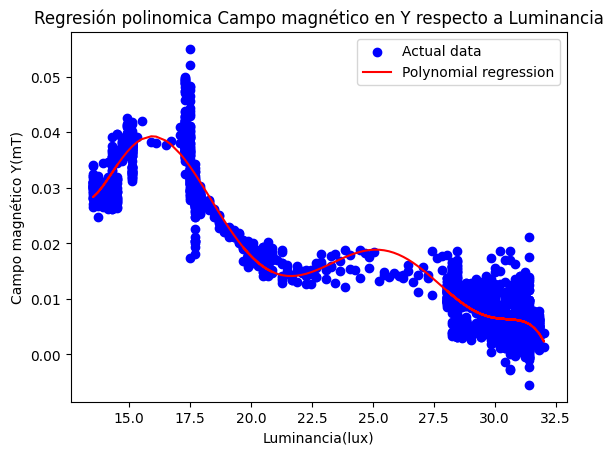

In [ ]:
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético Y(mT)']
X = X.values.reshape(-1, 1)

degree = 7

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomica Campo magnético en Y respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Y(mT)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Comparando con la regresión lineal con offset de forma manual



Error medio cuadrático: [[2.30648185e-05]]
Pendiente:  -0.0017930359400313697
Intercepto:  0.061048529756100145


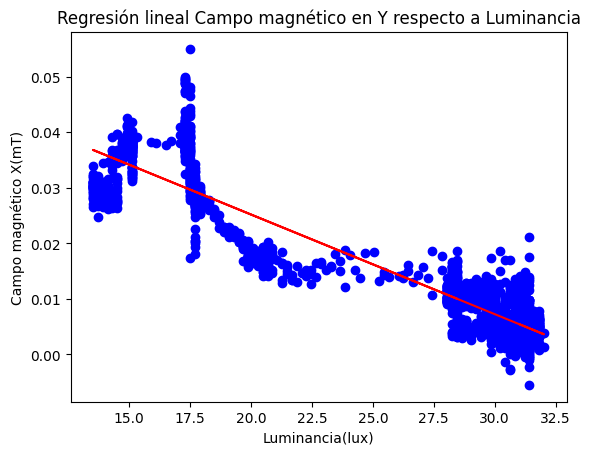

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en Y respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.006801643122987641
0.9470305124836769


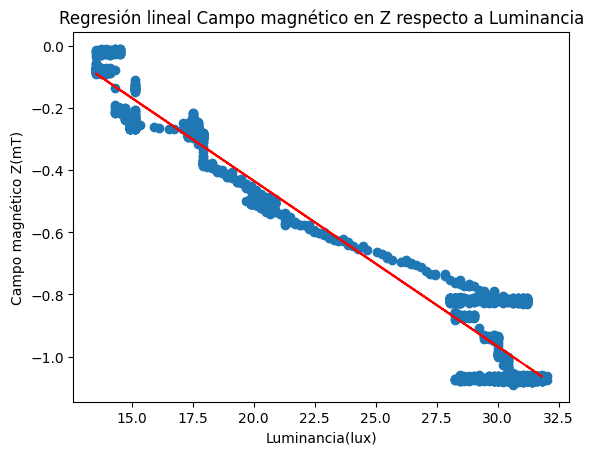

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en Z respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Z(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
0.006144559167304291
Coeficiente de determinación (R^2):
0.9521392630883262


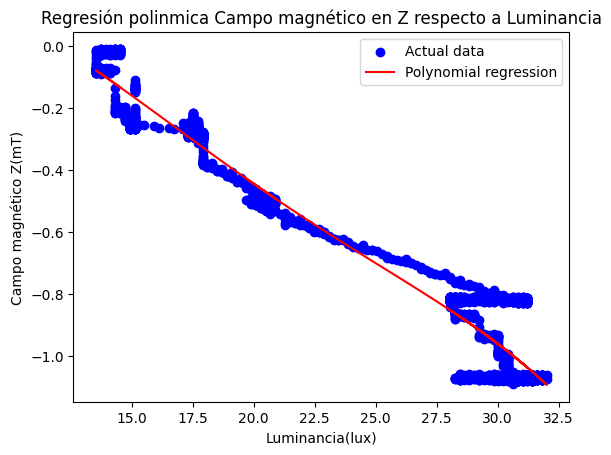

In [ ]:
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético Z(mT)']
X = X.values.reshape(-1, 1)

degree = 4

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinmica Campo magnético en Z respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Z(mT)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Regresión lineal con offset de forma manual

Error medio cuadrático: [[0.00605958]]
Pendiente:  -0.053244869702522624
Intercepto:  0.630333800386202


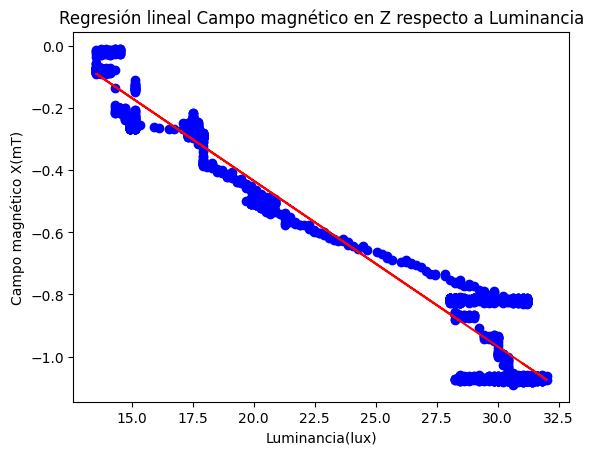

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en Z respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
1.1075237488773197
0.952852423686639


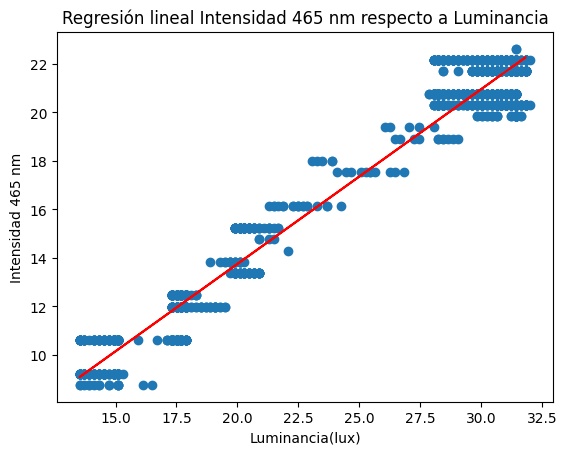

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 465 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 465 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
0.62897038090415
Coeficiente de determinación (R^2):
0.9731625937691173


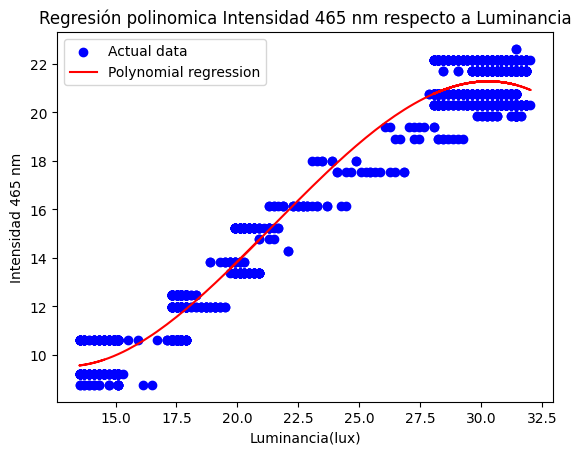

In [ ]:
X = df_01C['Luminancia(lux)']
y = df_01C['Intensidad 465 nm']
X = X.values.reshape(-1, 1)

degree = 4

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomica Intensidad 465 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 465 nm")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

## Regresión lineal con offset de forma manual

Error medio cuadrático [[1.055017]]
Pendiente:  0.7200786591883119
Intercepto:  -0.6463564049347497


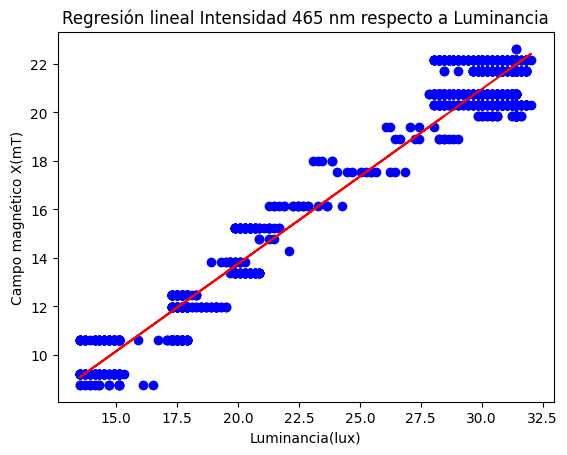

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 465 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.10218169059609916
0.934629388849008


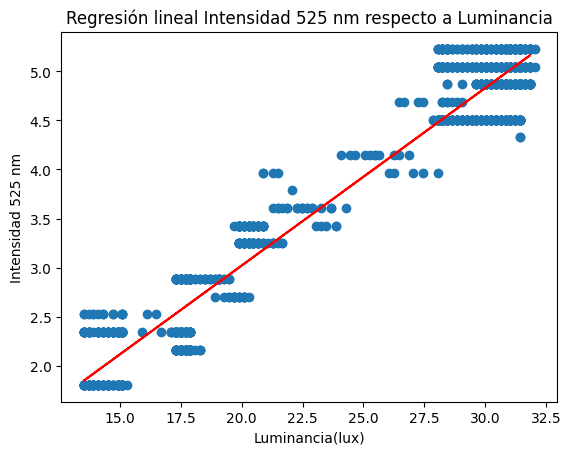

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 525 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 525 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
0.07675639787036267
Coeficiente de determinación (R^2):
0.9495614822279255


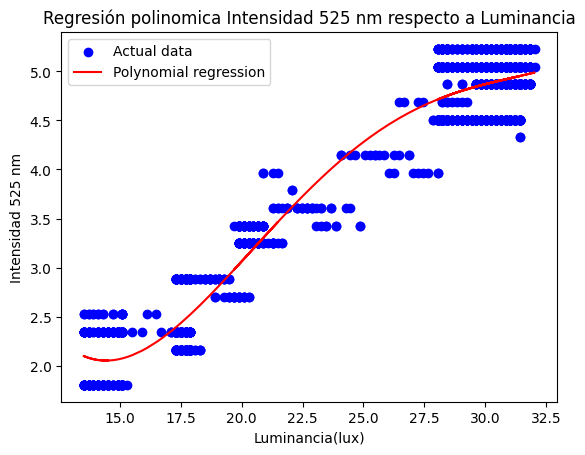

In [ ]:
X = df_01C['Luminancia(lux)']
y = df_01C['Intensidad 525 nm']
X = X.values.reshape(-1, 1)

degree = 4

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomica Intensidad 525 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 525 nm")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Error medio cuadrático: [[0.0941054]]
Pendiente:  0.1812571381724517
Intercepto:  -0.6055186045450967


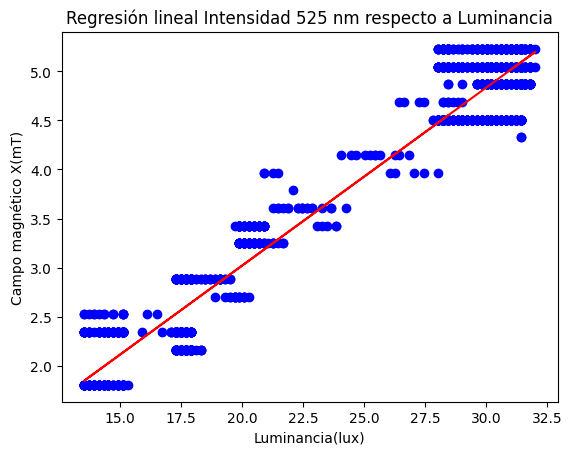

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 525 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
1.396233200411002
0.6893337171487917


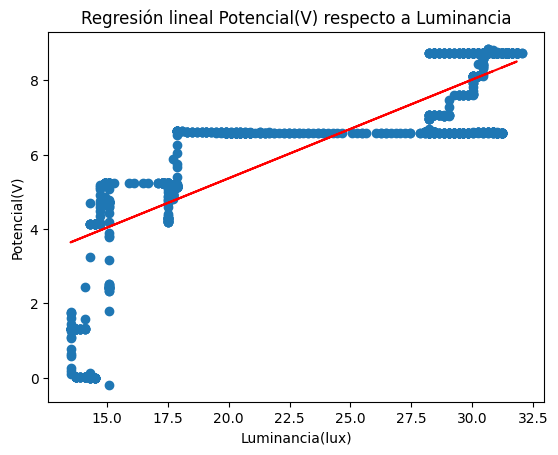

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Potencial(V)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Potencial(V) respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Potencial(V)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Un modelo lineal no ajusta adecuadamente al comportamiento de los datos para la luminancia y el potencial eléctrico.

Ahora realicemos una relacion con los valores de potencial que fue un dato con el que se tuvo mayor control y operatividad al momento de realizar las medidas.

Error medio cuadrado:
0.7726800748023703
Coeficiente de determinación (R^2):
0.8219246865843994


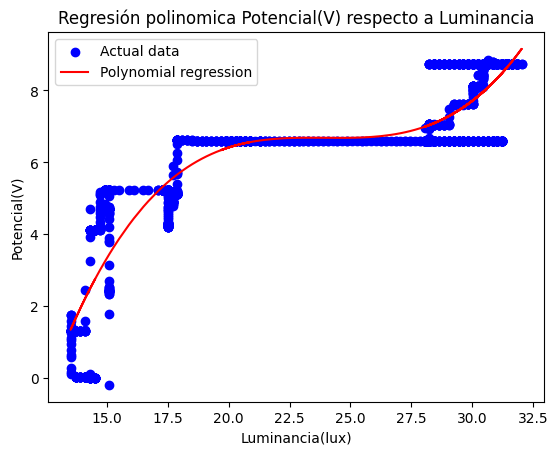

In [ ]:
X = df_01C['Luminancia(lux)']
y = df_01C['Potencial(V)']
X = X.values.reshape(-1, 1)

degree = 3

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomica Potencial(V) respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Potencial(V)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Regresión lineal manual con offset

Error medio cuadrático: [[1.25257609]]
Pendiente:  0.26573160169115395
Intercepto:  0.04476322501302832


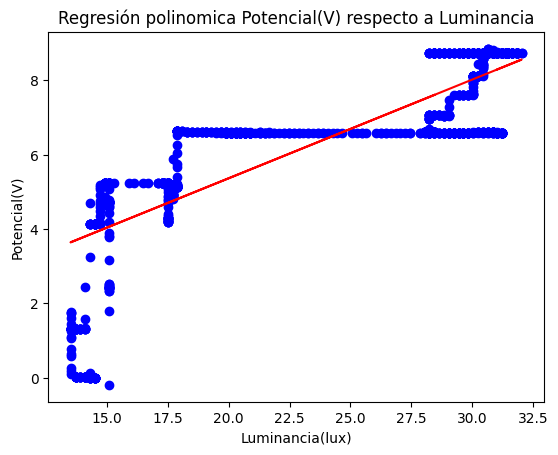

In [ ]:
# División de los datos entre train y test
X = df_01C['Luminancia(lux)']
y = df_01C['Potencial(V)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión polinomica Potencial(V) respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Potencial(V)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.038254546498257214
0.7900994018183272


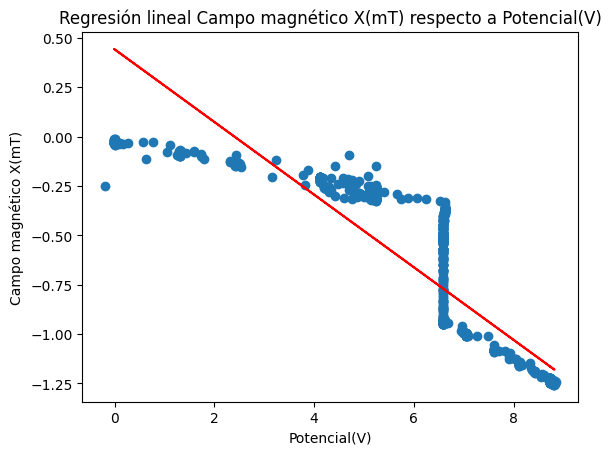

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.03720921]]
Pendiente:  -0.1840798520179623
Intercepto:  0.4423138298386391


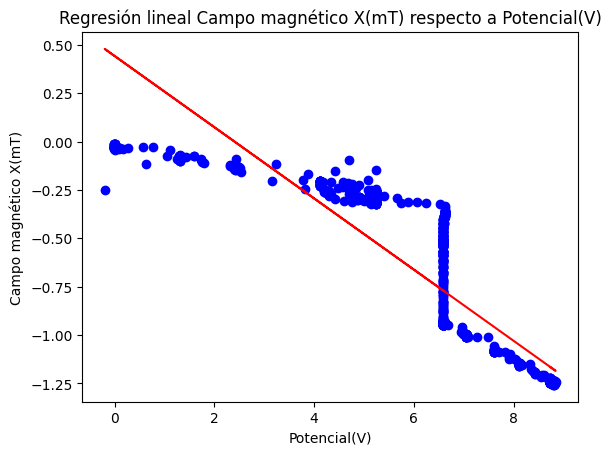

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.021505239138806077
Coeficiente de determinación (R^2):
0.8823390787131102


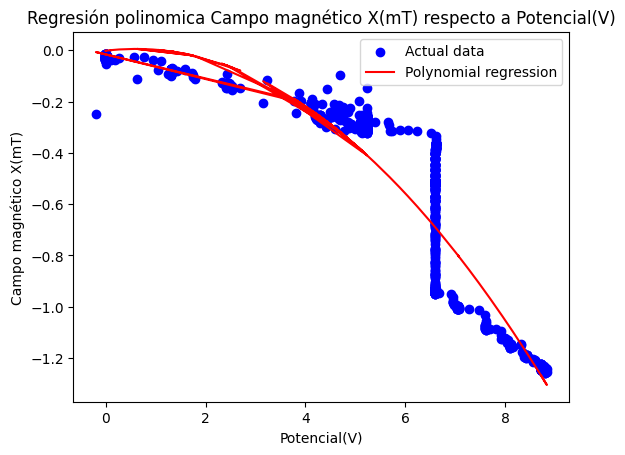

In [ ]:
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético X(mT)']
X = X.values.reshape(-1, 1)

degree = 2

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomica Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Error medio cuadrado:
6.8503346290601e-05
Coeficiente de determinación (R^2):
0.5759957240096547


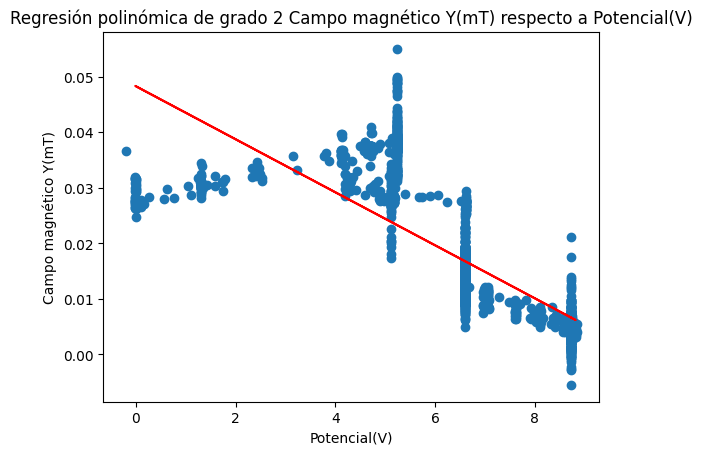

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# División de los datos entre train y test
X = df_01C['Potencial(V)'].values.reshape(-1, 1)  # Asegúrate de convertir a numpy array y darle la forma adecuada
y = df_01C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)

# Ajustar y transformar las características de entrenamiento
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Ajustar el modelo de regresión lineal polinómica
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Transformar las características de prueba y hacer predicciones
X_test_poly = poly.transform(X_test)
Prediccion = model.predict(X_test_poly)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresión ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresión polinómica de grado 2')
plt.title("Regresión polinómica de grado 2 Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(Y_test, Prediccion))

plt.show()

Error medio cuadrado:
4.15221923157419e-05
Coeficiente de determinación (R^2):
0.7432676075275155


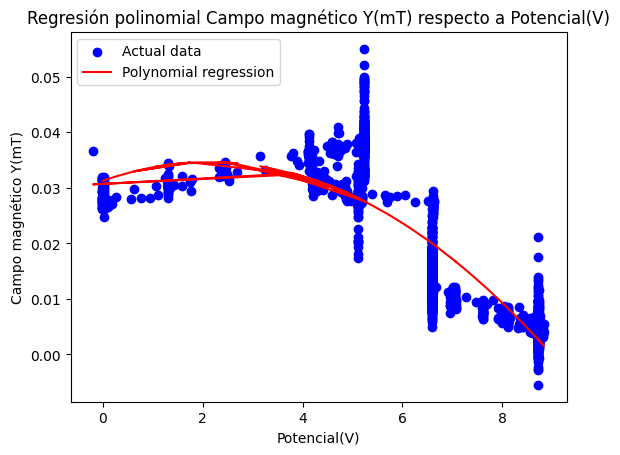

In [ ]:
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético Y(mT)']
X = X.values.reshape(-1, 1)

degree = 2

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomial Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Regresión lineal manual con offset

Error medio cuadrático: [[6.38859884e-05]]
Pendiente:  -0.0047713508056661524
Intercepto:  0.04826873056911413


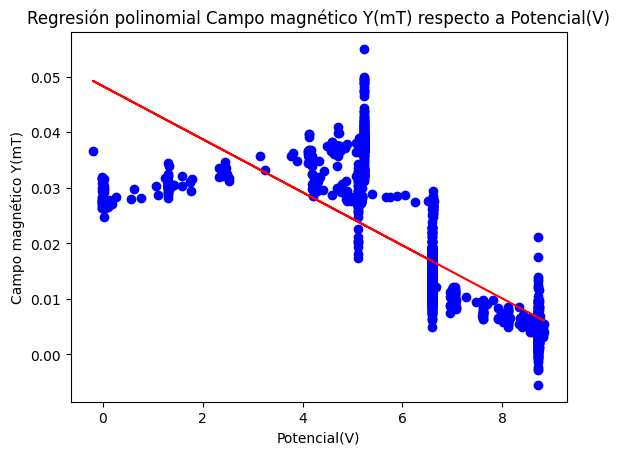

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión polinomial Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.02328974513341843
0.8186253171776128


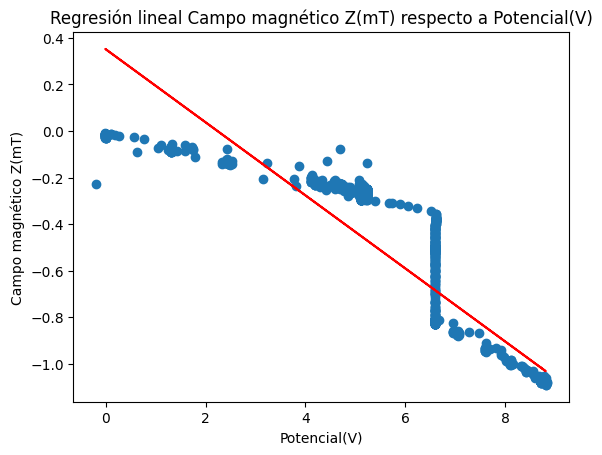

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
0.013259615153584266
Coeficiente de determinación (R^2):
0.8967192055383599


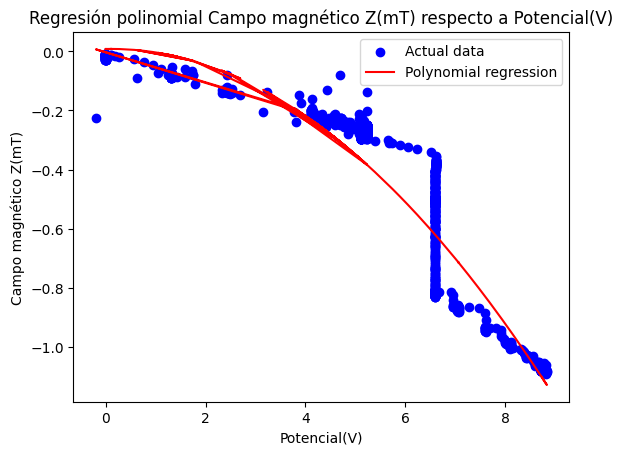

In [ ]:
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético Z(mT)']
X = X.values.reshape(-1, 1)

degree = 2

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomial Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Regresión lineal manual con offset

Error medio cuadrático: [[0.02262885]]
Pendiente:  -0.15682717162715631
Intercepto:  0.35105626391412237


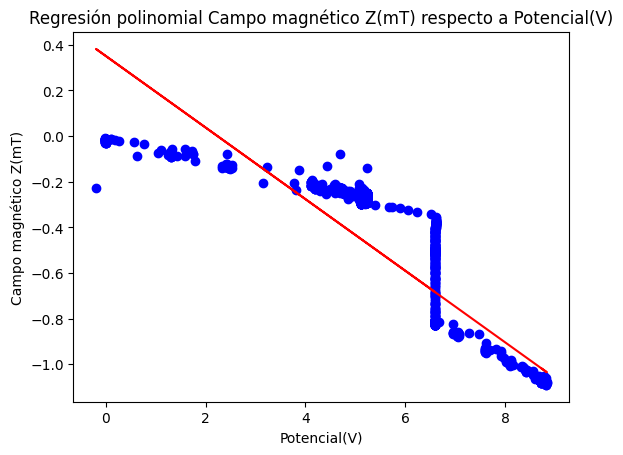

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión polinomial Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.5489948250984713
0.6487812344260719


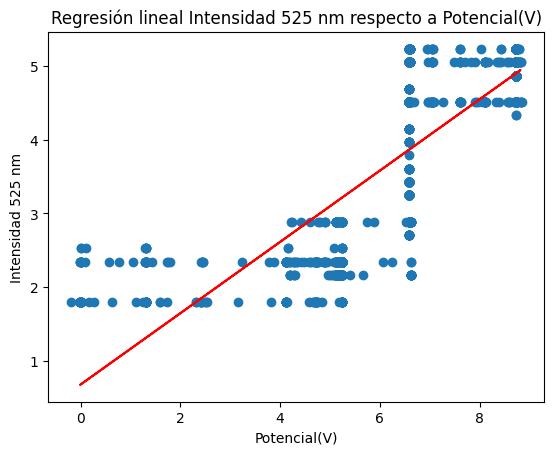

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
0.43094436066844793
Coeficiente de determinación (R^2):
0.7168158564311209


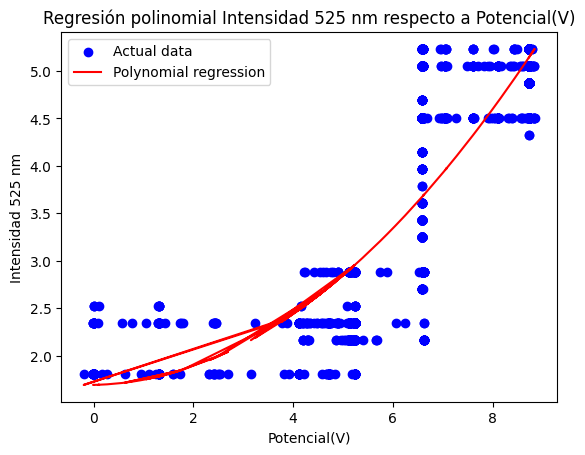

In [ ]:
X = df_01C['Potencial(V)']
y = df_01C['Intensidad 525 nm']
X = X.values.reshape(-1, 1)

degree = 2

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomial Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Regresión lineal manual con offset

Error medio cuadrático: [[0.50568566]]
Pendiente:  0.4836761297284866
Intercepto:  0.6774976431300814


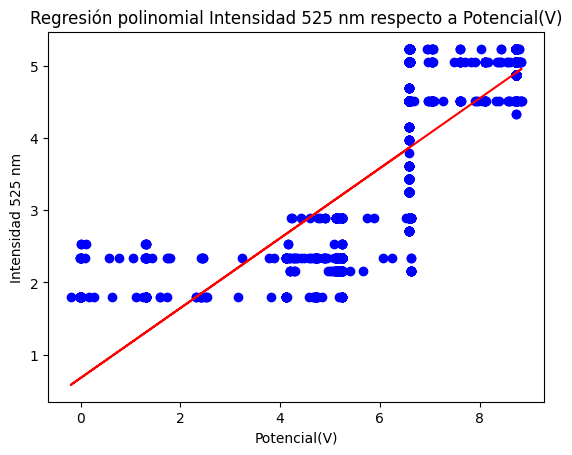

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión polinomial Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
8.48306585476708
0.6388736628317662


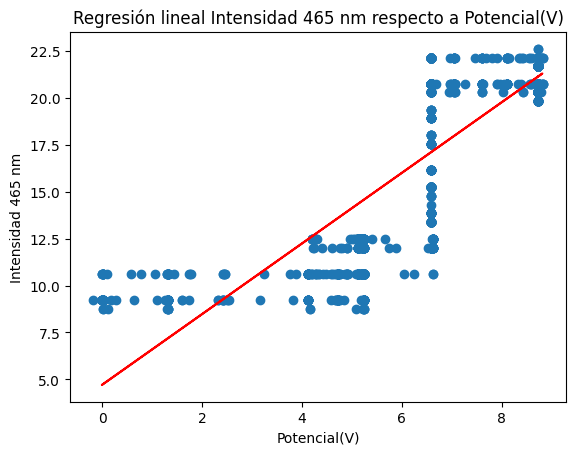

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrado:
7.330504772826838
Coeficiente de determinación (R^2):
0.6872162180626451


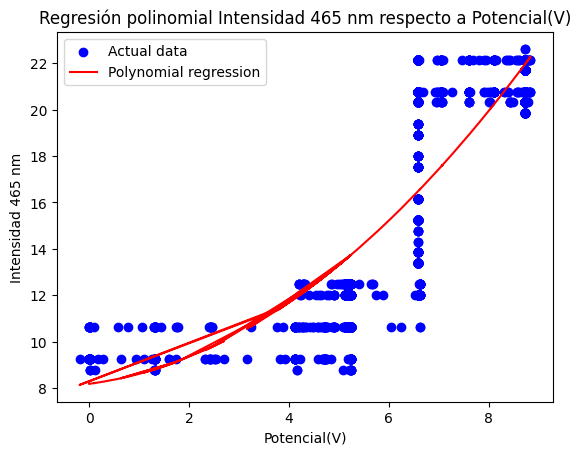

In [ ]:
X = df_01C['Potencial(V)']
y = df_01C['Intensidad 465 nm']
X = X.values.reshape(-1, 1)

degree = 2

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial regression')
plt.title("Regresión polinomial Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")
plt.legend()

# Calcular el error medio cuadrado
print("Error medio cuadrado:")
print(mean_squared_error(y, y_pred))

# Calcular el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):")
print(r2_score(y, y_pred))

plt.show()

Regresión lineal con offset

Error medio cuadrático: [[8.22451177]]
Pendiente:  1.8802635237945964
Intercepto:  4.723618062449447


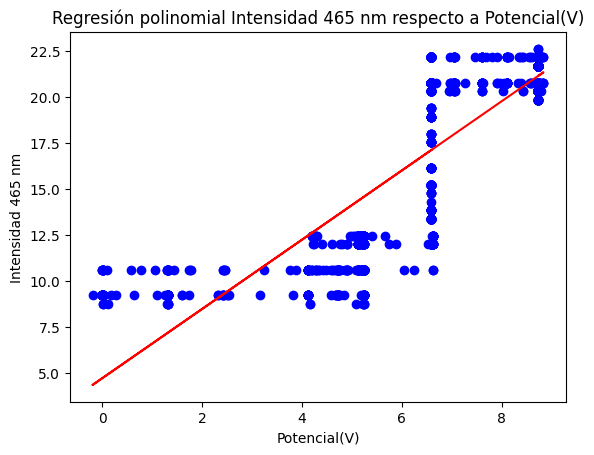

In [ ]:
# División de los datos entre train y test
X = df_01C['Potencial(V)']
y = df_01C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión polinomial Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

###Replicación a los demás dataframes

In [ ]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el atributo shape para observar el tamaño del dataset.
df_02.shape

(2401, 10)

In [ ]:
# Usamos el método info() para obtener información de las columnas del dataset.
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el método unique() sobre la columna deseada para verificar cúales son los valores únicos.
print(df_02['Intensidad UV'].unique())
print(df_02['Intensidad 615 nm'].unique())

[0]
[0]


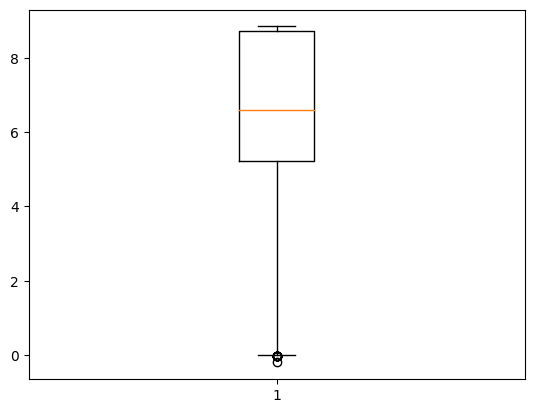

In [ ]:
potential = df_02['Potencial(V)']
plt.boxplot([potential])
plt.show()

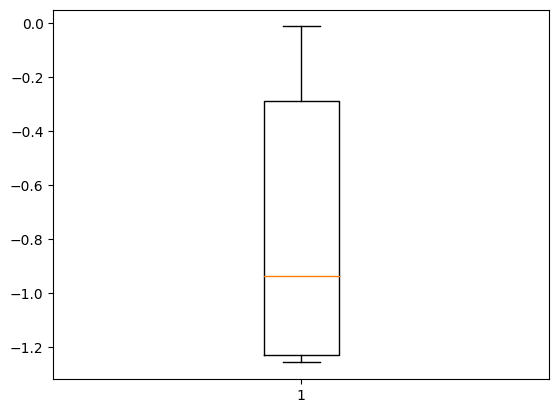

In [ ]:
MX = df_02['Campo magnético X(mT)']
plt.boxplot([MX])
plt.show()

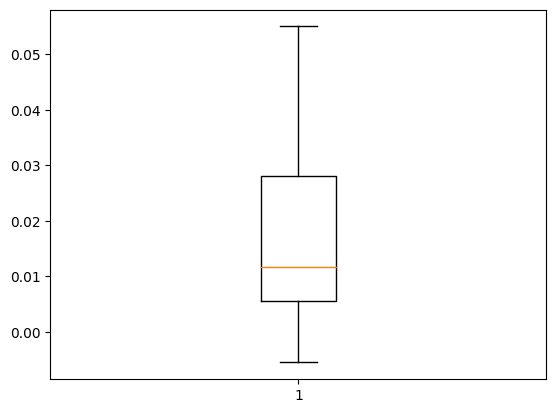

In [ ]:
MY = df_02['Campo magnético Y(mT)']
plt.boxplot([MY])
plt.show()

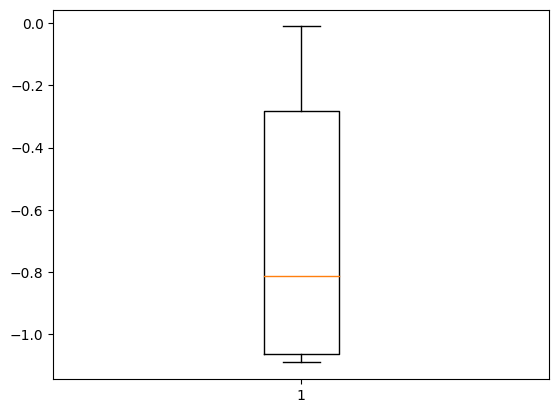

In [ ]:
MZ = df_02['Campo magnético Z(mT)']
plt.boxplot([MZ])
plt.show()

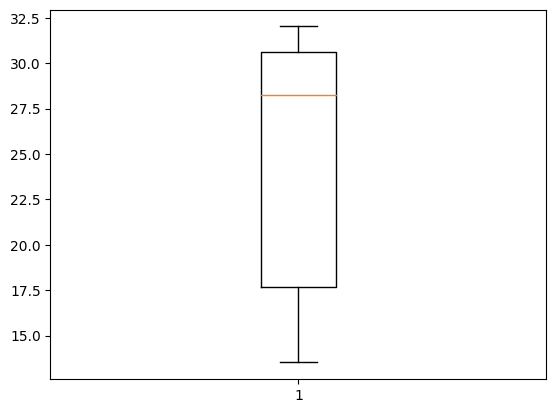

In [ ]:
L = df_02['Luminancia(lux)']
plt.boxplot([L])
plt.show()

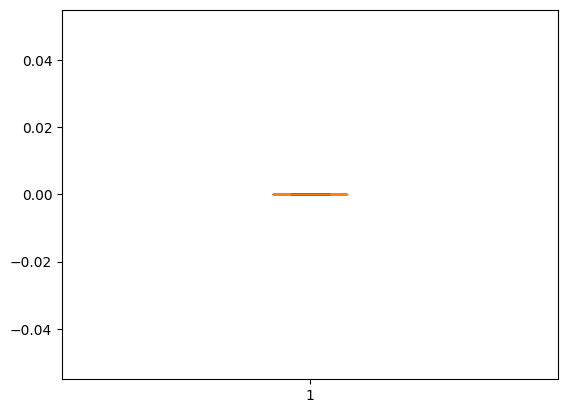

In [ ]:
UV = df_02['Intensidad UV']
plt.boxplot([UV])
plt.show()

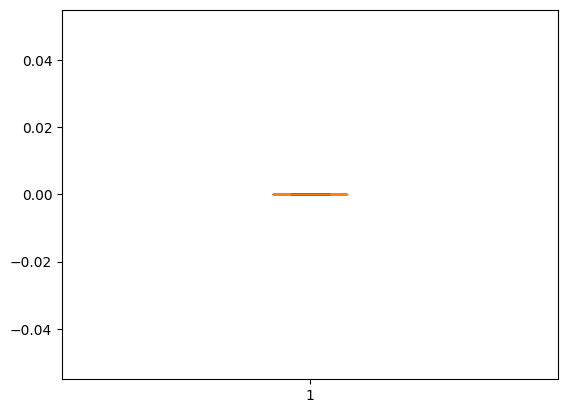

In [ ]:
I1 = df_02['Intensidad 615 nm']
plt.boxplot([I1])
plt.show()

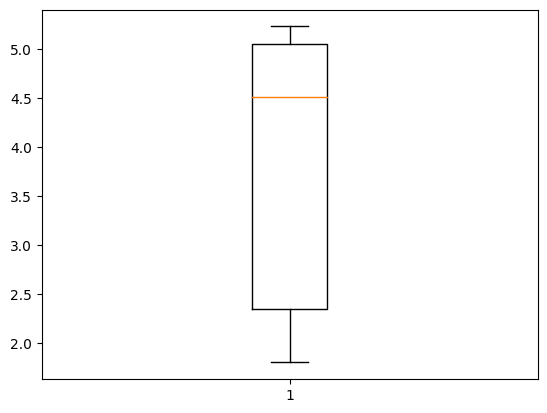

In [ ]:
I2 = df_02['Intensidad 525 nm']
plt.boxplot([I2])
plt.show()

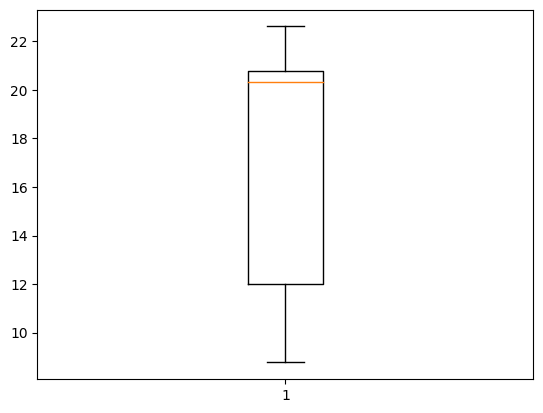

In [ ]:
I3 = df_02['Intensidad 465 nm']
plt.boxplot([I3])
plt.show()

Como los data frames tienen valores cero en las columnas $\mathrm{UV}$ y $615\mathrm{nm}$, pueden ser eliminados ya que no aportan información alguna y como se va a ver más adelante, no tienen correlacion alguna con las demás características.

In [ ]:
df_02C = df_02.drop(columns=['Intensidad UV', 'Intensidad 615 nm'])
df_02C

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00     -0.009556              -0.032917               0.027225   
1          0.05     -0.010973              -0.027817               0.028125   
2          0.10     -0.010265              -0.025267               0.026325   
3          0.15     -0.010973              -0.033067               0.028275   
4          0.20     -0.010265              -0.014017               0.027375   
...         ...           ...                    ...                    ...   
2396     119.80      8.729351              -1.227818               0.003375   
2397     119.85      8.729351              -1.228418               0.003825   
2398     119.90      8.729351              -1.226918               0.004275   
2399     119.95      8.729351              -1.224518               0.006075   
2400     120.00      8.729351              -1.227068               0.003825   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad 525 nm  \
0                 -0.010810        14.518775           1.803231   
1                 -0.016960        14.518775           1.803231   
2                 -0.028210        14.518775           1.803231   
3                 -0.025510        14.518775           1.803231   
4                 -0.025360        14.518775           1.803231   
...                     ...              ...                ...   
2396              -1.073861        30.429762           4.508079   
2397              -1.076411        30.429762           4.508079   
2398              -1.077161        30.429762           5.049048   
2399              -1.077610        30.429762           5.049048   
2400              -1.076261        30.628649           5.229371   

      Intensidad 465 nm  
0              9.229990  
1              9.229990  
2              9.229990  
3              9.229990  
4              9.229990  
...                 ...  
2396          20.767477  
2397          20.767477  
2398          22.151978  
2399          22.151978  
2400          20.305979  

[2401 rows x 8 columns]

In [ ]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
df_02C.describe()

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  \
count  2401.000000   2401.000000            2401.000000   
mean     60.000000      6.601657              -0.773525   
std      34.662666      2.083476               0.427609   
min       0.000000     -0.198175              -1.257968   
25%      30.000000      5.232088              -1.229318   
50%      60.000000      6.592134              -0.936217   
75%      90.000000      8.727226              -0.288817   
max     120.000000      8.839973              -0.013867   

       Campo magnético Y(mT)  Campo magnético Z(mT)  Luminancia(lux)  \
count            2401.000000            2401.000000      2401.000000   
mean                0.016762              -0.684726        24.707009   
std                 0.012720               0.358382         6.559007   
min                -0.005475              -1.090811        13.524339   
25%                 0.005625              -1.063511        17.700974   
50%                 0.011775              -0.812861        28.242001   
75%                 0.028125              -0.283060        30.628649   
max                 0.054975              -0.010360        32.020859   

       Intensidad 525 nm  Intensidad 465 nm  
count        2401.000000        2401.000000  
mean            3.874206          17.154865  
std             1.233862           4.842117  
min             1.803231           8.768491  
25%             2.344201          11.998986  
50%             4.508079          20.305979  
75%             5.049048          20.767477  
max             5.229371          22.613476

###Análisis de correlación y regresiones a df_02

<Axes: >

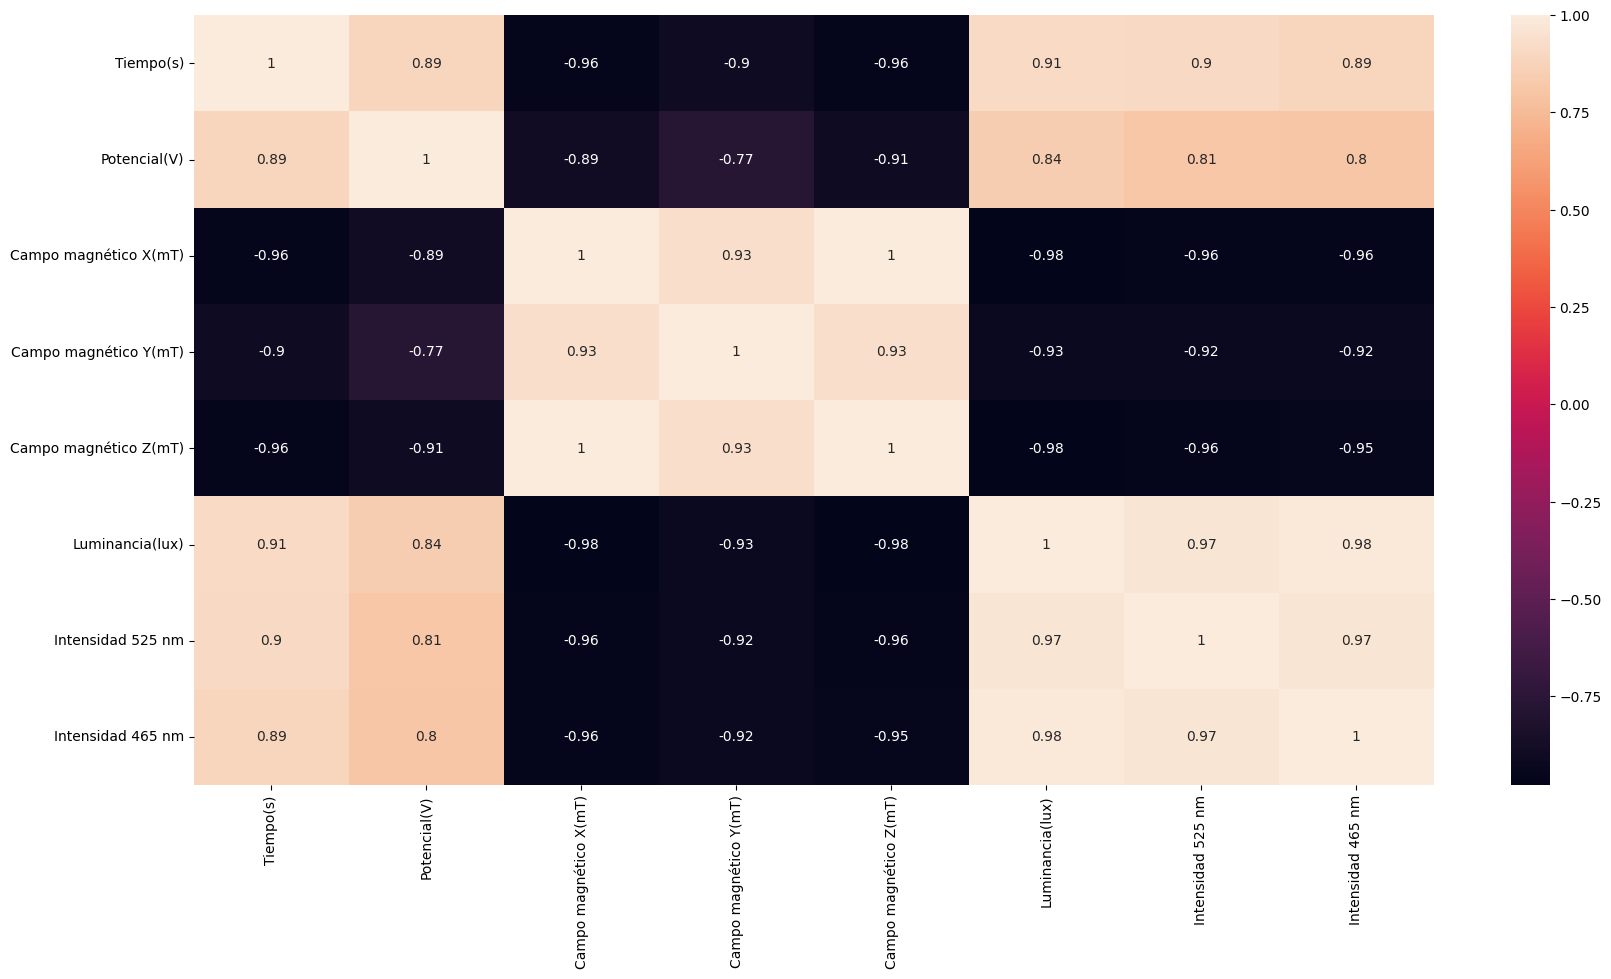

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_02C.corr(), annot=True)

Vamos a realizar un modelo de regresion lineal tanto univariable como multivariable con los diversos datos que nos hayan mostrado un alto valor de correlación.

Error medio cuadrado:
0.00879687799742093
0.9517320129811506


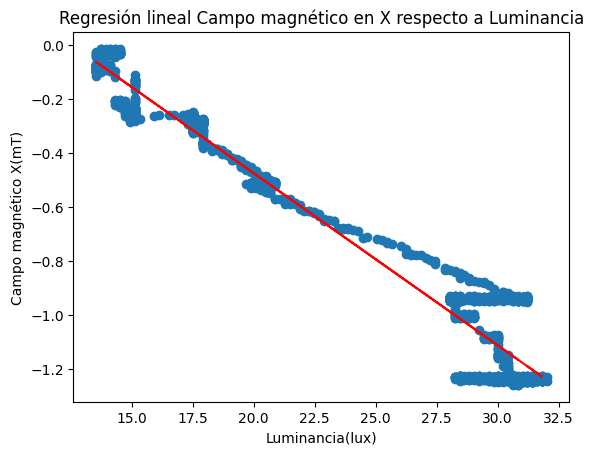

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.00781781]]
Pendiente:  -0.06370312762177932
Intercepto:  0.7999532762749251


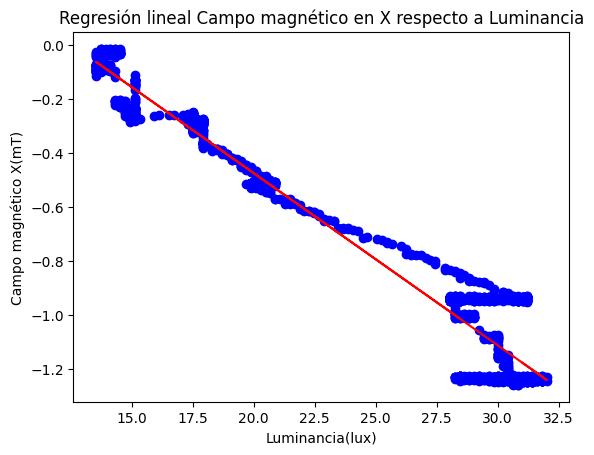

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
2.324187760538981e-05
0.8561434437826633


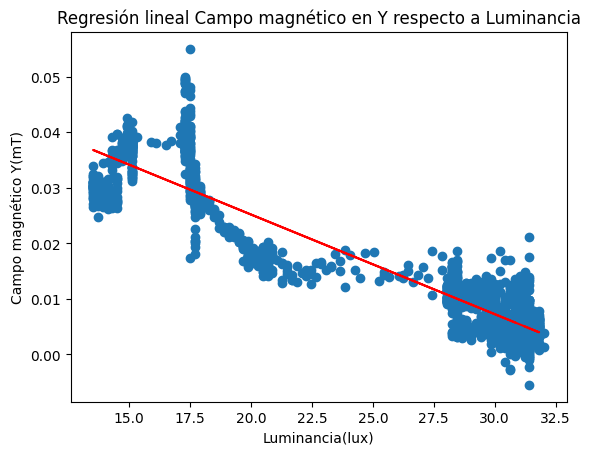

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en Y respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Y(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[2.30648185e-05]]
Pendiente:  -0.0017930359400313697
Intercepto:  0.061048529756100145


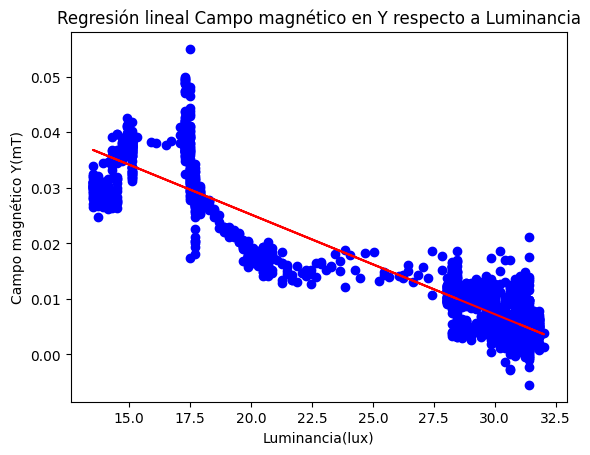

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en Y respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Y(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.006801643122987641
0.9470305124836769


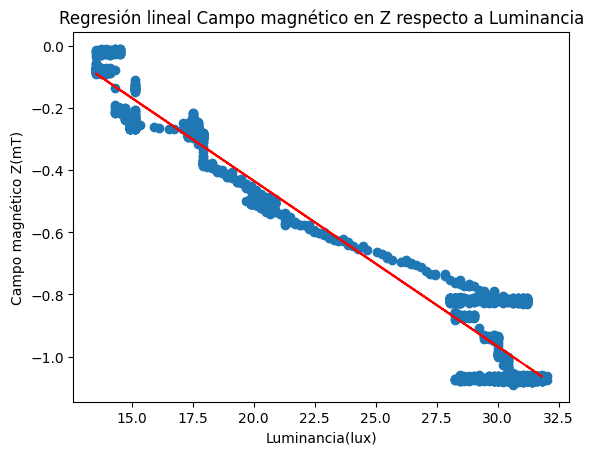

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en Z respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Z(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.00605958]]
Pendiente:  -0.053244869702522624
Intercepto:  0.630333800386202


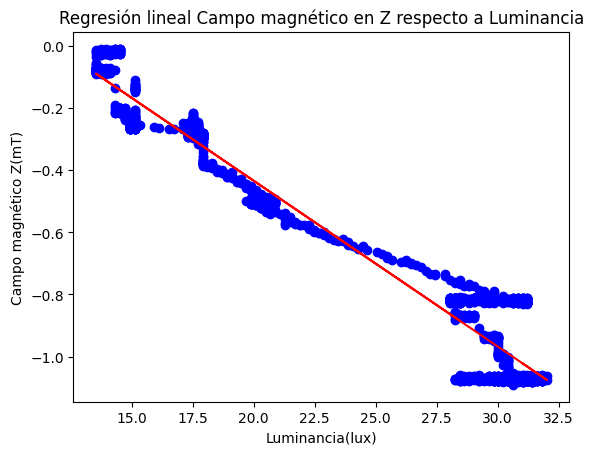

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en Z respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético Z(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
1.1075237488773197
0.952852423686639


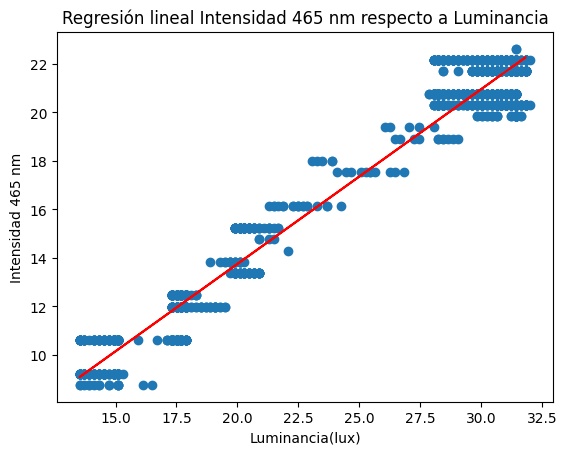

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 465 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 465 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[1.055017]]
Pendiente:  0.7200786591883119
Intercepto:  -0.6463564049347497


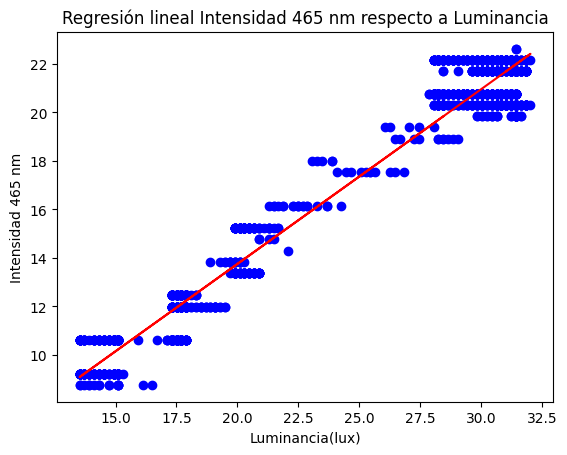

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 465 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 465 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.10218169059609916
0.934629388849008


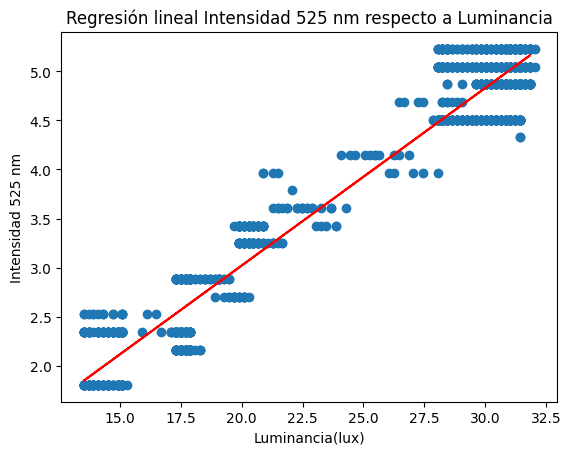

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 525 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 525 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.0941054]]
Pendiente:  0.1812571381724517
Intercepto:  -0.6055186045450967


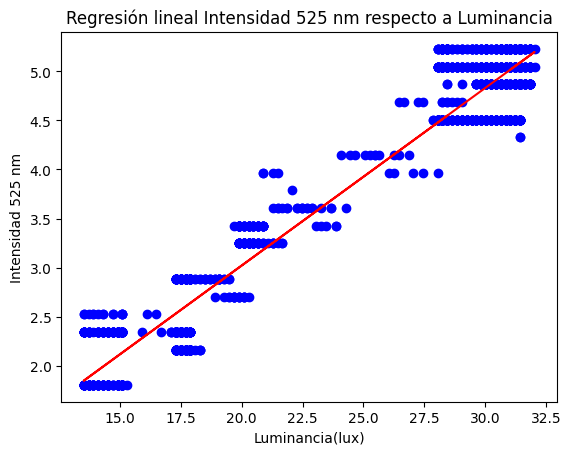

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 525 nm respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Intensidad 525 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
1.396233200411002
0.6893337171487917


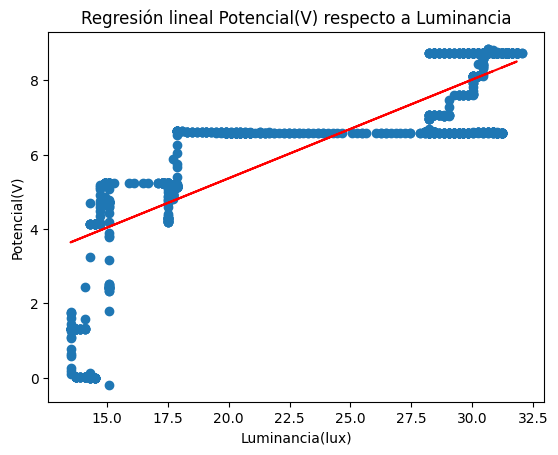

In [ ]:
# División de los datos entre train y test
X = df_02C['Luminancia(lux)']
y = df_02C['Potencial(V)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Potencial(V) respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Potencial(V)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Un modelo lineal no ajusta adecuadamente al comportamiento de los datos para la luminancia y el potencial eléctrico.

Ahora realicemos una relacion con los valores de potencial que fue un dato con el que se tuvo mayor control y operatividad al momento de realizar las medidas.

Error medio cuadrado:
0.038254546498257214
0.7900994018183272


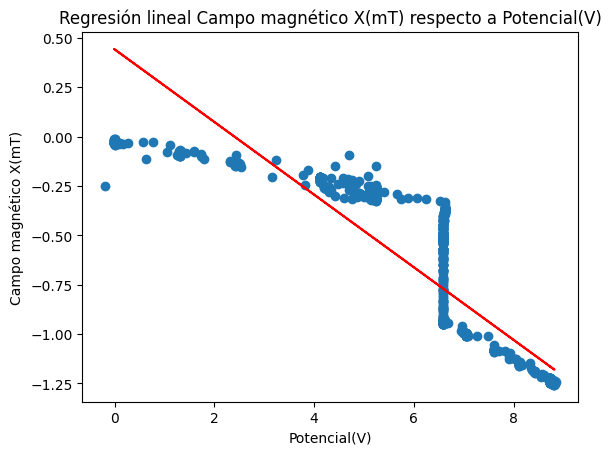

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.03720921]]
Pendiente:  -0.1840798520179623
Intercepto:  0.4423138298386391


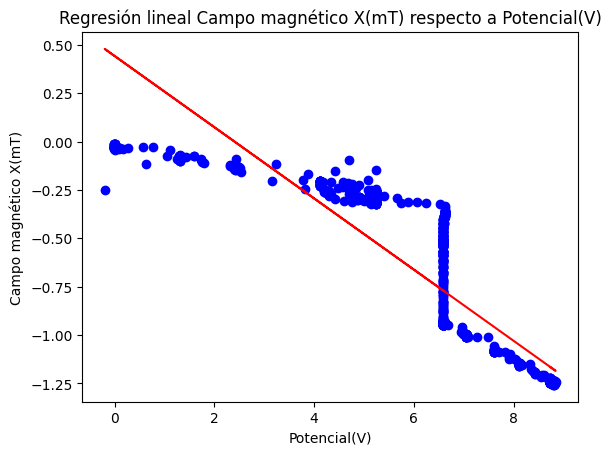

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
6.8503346290601e-05
0.5759957240096547


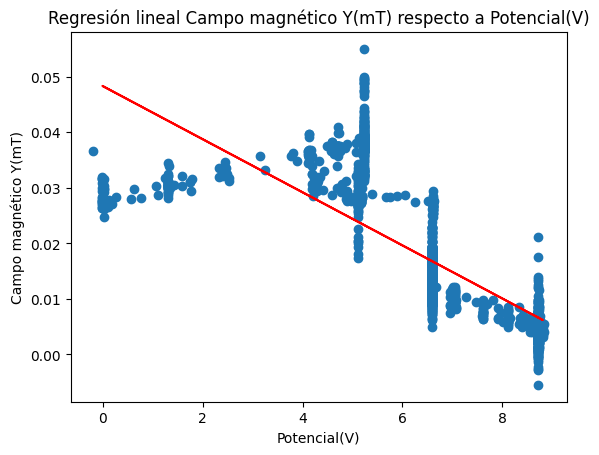

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[6.38859884e-05]]
Pendiente:  -0.0047713508056661524
Intercepto:  0.04826873056911413


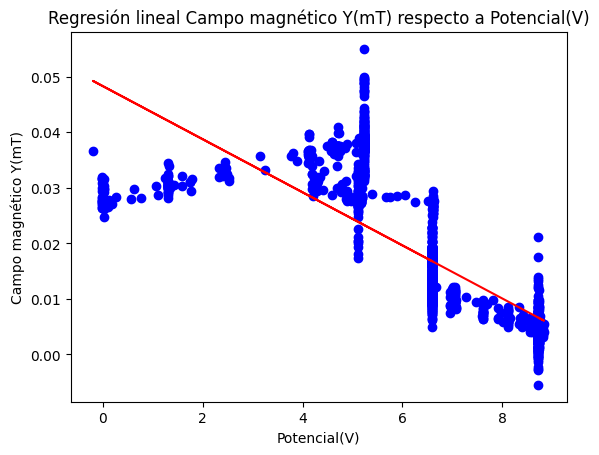

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.02328974513341843
0.8186253171776128


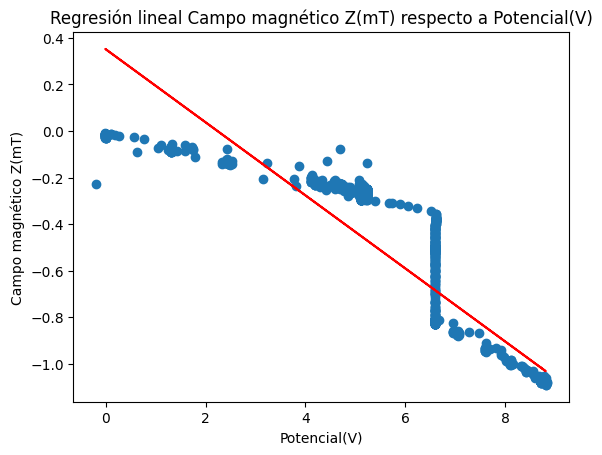

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrático: [[0.02262885]]
Pendiente:  -0.15682717162715631
Intercepto:  0.35105626391412237


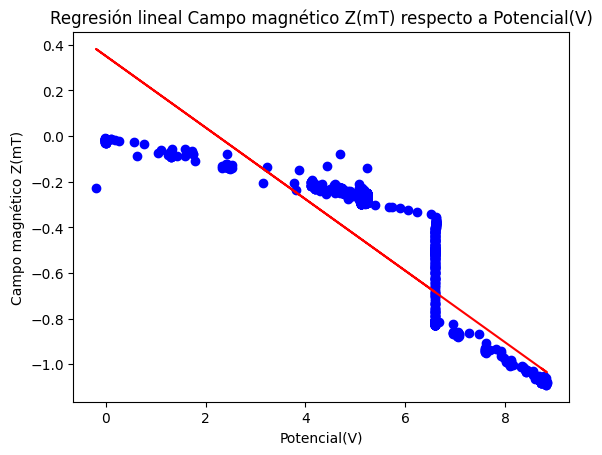

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.5489948250984713
0.6487812344260719


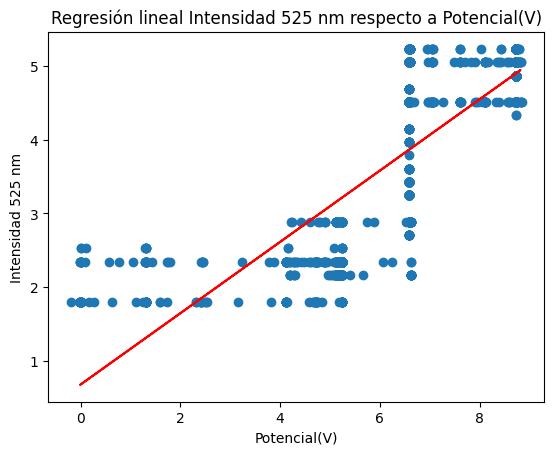

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.50568566]]
Pendiente:  0.4836761297284866
Intercepto:  0.6774976431300814


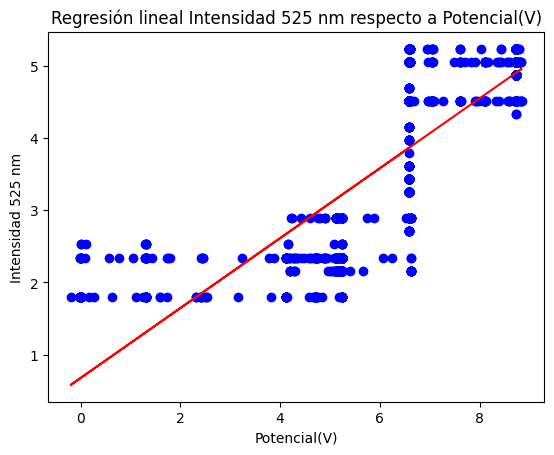

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
8.48306585476708
0.6388736628317662


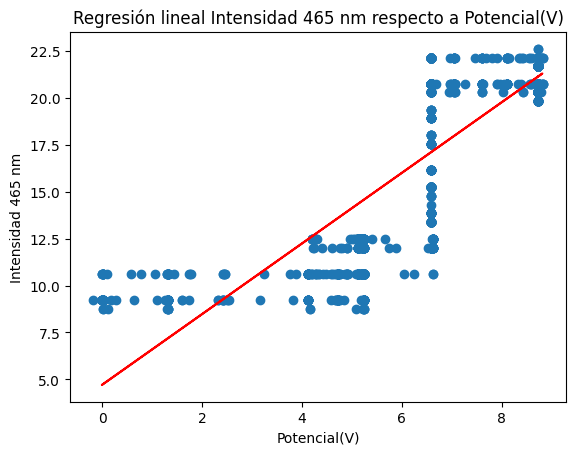

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[8.22451177]]
Pendiente:  1.8802635237945964
Intercepto:  4.723618062449447


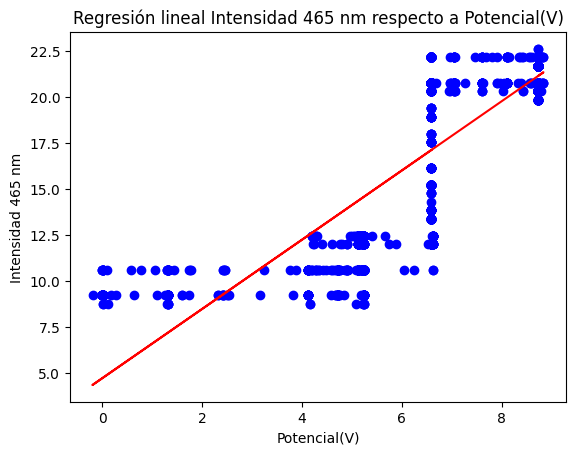

In [ ]:
# División de los datos entre train y test
X = df_02C['Potencial(V)']
y = df_02C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

df_03

In [ ]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el atributo shape para observar el tamaño del dataset.
df_03.shape

(2401, 10)

In [ ]:
# Usamos el método info() para obtener información de las columnas del dataset.
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el método unique() sobre la columna deseada para verificar cúales son los valores únicos.
print(df_03['Intensidad UV'].unique())
print(df_03['Intensidad 615 nm'].unique())

[0]
[0]


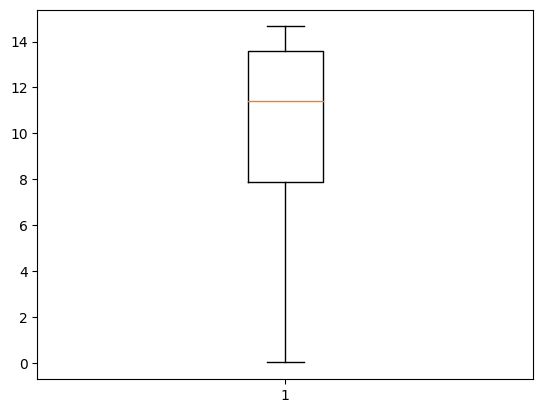

In [ ]:
potential = df_03['Potencial(V)']
plt.boxplot([potential])
plt.show()

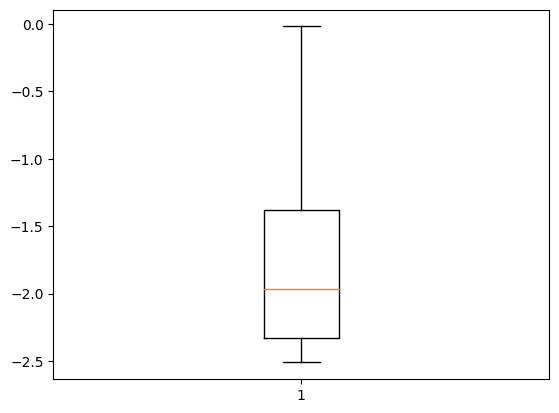

In [ ]:
MX = df_03['Campo magnético X(mT)']
plt.boxplot([MX])
plt.show()

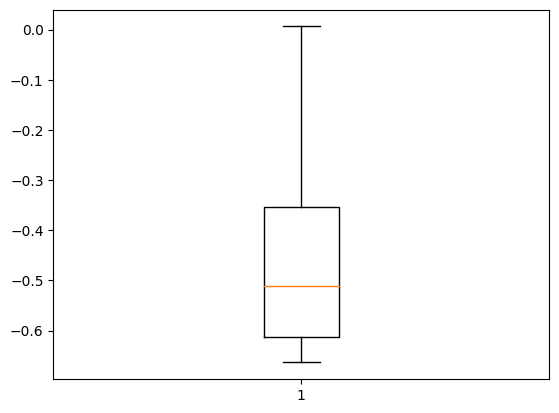

In [ ]:
MY = df_03['Campo magnético Y(mT)']
plt.boxplot([MY])
plt.show()

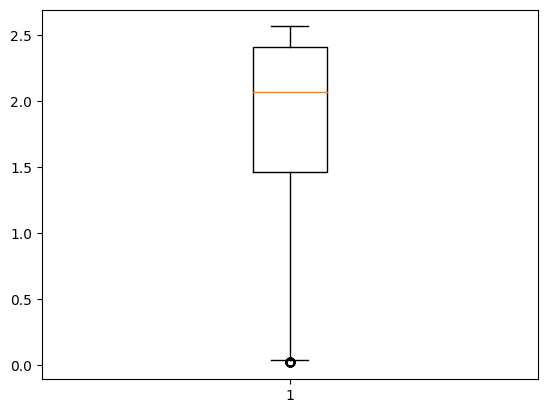

In [ ]:
MZ = df_03['Campo magnético Z(mT)']
plt.boxplot([MZ])
plt.show()

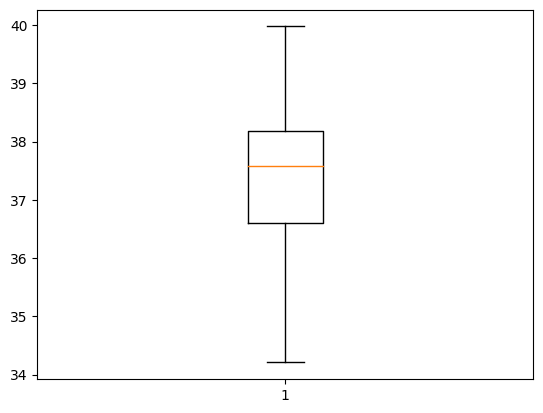

In [ ]:
L = df_03['Luminancia(lux)']
plt.boxplot([L])
plt.show()

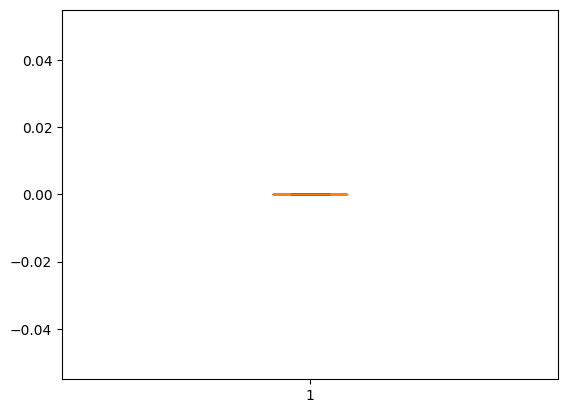

In [ ]:
UV = df_03['Intensidad UV']
plt.boxplot([UV])
plt.show()

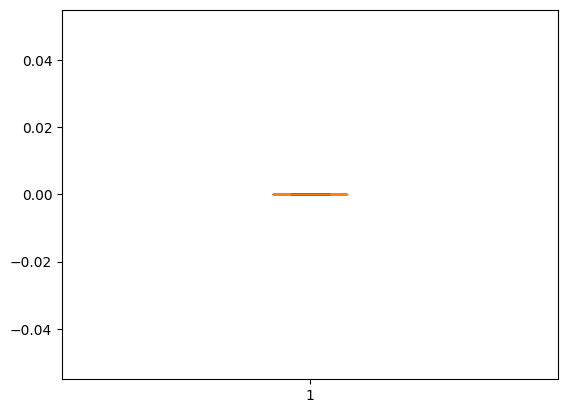

In [ ]:
I1 = df_03['Intensidad 615 nm']
plt.boxplot([I1])
plt.show()

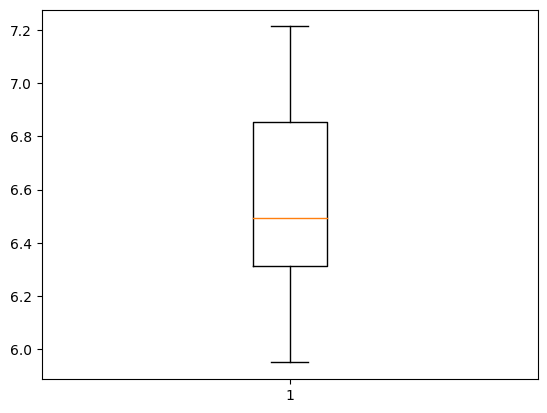

In [ ]:
I2 = df_03['Intensidad 525 nm']
plt.boxplot([I2])
plt.show()

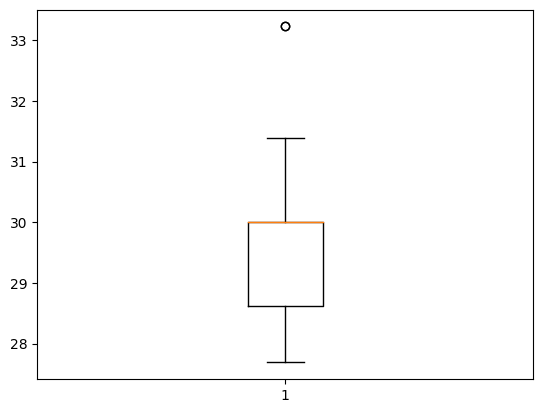

In [ ]:
I3 = df_03['Intensidad 465 nm']
plt.boxplot([I3])
plt.show()

Como los data frames tienen valores cero en las columnas $\mathrm{UV}$ y $615\mathrm{nm}$, pueden ser eliminados ya que no aportan información alguna y como se va a ver más adelante, no tienen correlacion alguna con las demás características.

In [ ]:
df_03C = df_03.drop(columns=['Intensidad UV', 'Intensidad 615 nm'])
df_03C

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00      0.015263              -0.023017               0.004725   
1          0.05      0.013845              -0.019567              -0.001725   
2          0.10      0.013845              -0.019567              -0.001425   
3          0.15      0.014553              -0.019867              -0.000975   
4          0.20      0.015263              -0.025267               0.005625   
...         ...           ...                    ...                    ...   
2396     119.80     14.634003              -2.494567              -0.655575   
2397     119.85     14.634708              -2.498917              -0.653925   
2398     119.90     14.634003              -2.491567              -0.651525   
2399     119.95     14.634003              -2.486017              -0.650175   
2400     120.00     14.634003              -2.495018              -0.649125   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad 525 nm  \
0                  0.018440        37.191933           6.491633   
1                  0.019040        37.390820           6.491633   
2                  0.019490        37.390820           6.671956   
3                  0.018440        37.390820           6.671956   
4                  0.018290        37.390820           6.671956   
...                     ...              ...                ...   
2396               2.532740        39.976353           6.852280   
2397               2.545940        39.976353           6.852280   
2398               2.551039        39.976353           7.032602   
2399               2.513390        39.976353           7.032602   
2400               2.540689        39.976353           6.852280   

      Intensidad 465 nm  
0             28.151468  
1             28.151468  
2             28.612968  
3             28.612968  
4             28.612968  
...                 ...  
2396          31.381968  
2397          31.381968  
2398          29.535969  
2399          29.535969  
2400          31.381968  

[2401 rows x 8 columns]

In [ ]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
df_03C.describe()

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  \
count  2401.000000   2401.000000            2401.000000   
mean     60.000000     10.470991              -1.808874   
std      34.662666      3.606399               0.608775   
min       0.000000      0.013845              -2.511667   
25%      30.000000      7.870636              -2.331367   
50%      60.000000     11.408321              -1.969867   
75%      90.000000     13.580994              -1.381868   
max     120.000000     14.655273              -0.018517   

       Campo magnético Y(mT)  Campo magnético Z(mT)  Luminancia(lux)  \
count            2401.000000            2401.000000      2401.000000   
mean               -0.469687               1.876730        37.493369   
std                 0.163118               0.611778         1.381764   
min                -0.663525               0.017090        34.208622   
25%                -0.611775               1.459639        36.595268   
50%                -0.511725               2.067590        37.589706   
75%                -0.353475               2.412290        38.186367   
max                 0.006375               2.565289        39.976353   

       Intensidad 525 nm  Intensidad 465 nm  
count        2401.000000        2401.000000  
mean            6.596778          29.732408  
std             0.282002           1.001172  
min             5.950664          27.689970  
25%             6.311310          28.612968  
50%             6.491633          29.997467  
75%             6.852280          29.997467  
max             7.212925          33.227962

###Análisis de correlación y regresiones a df_01

<Axes: >

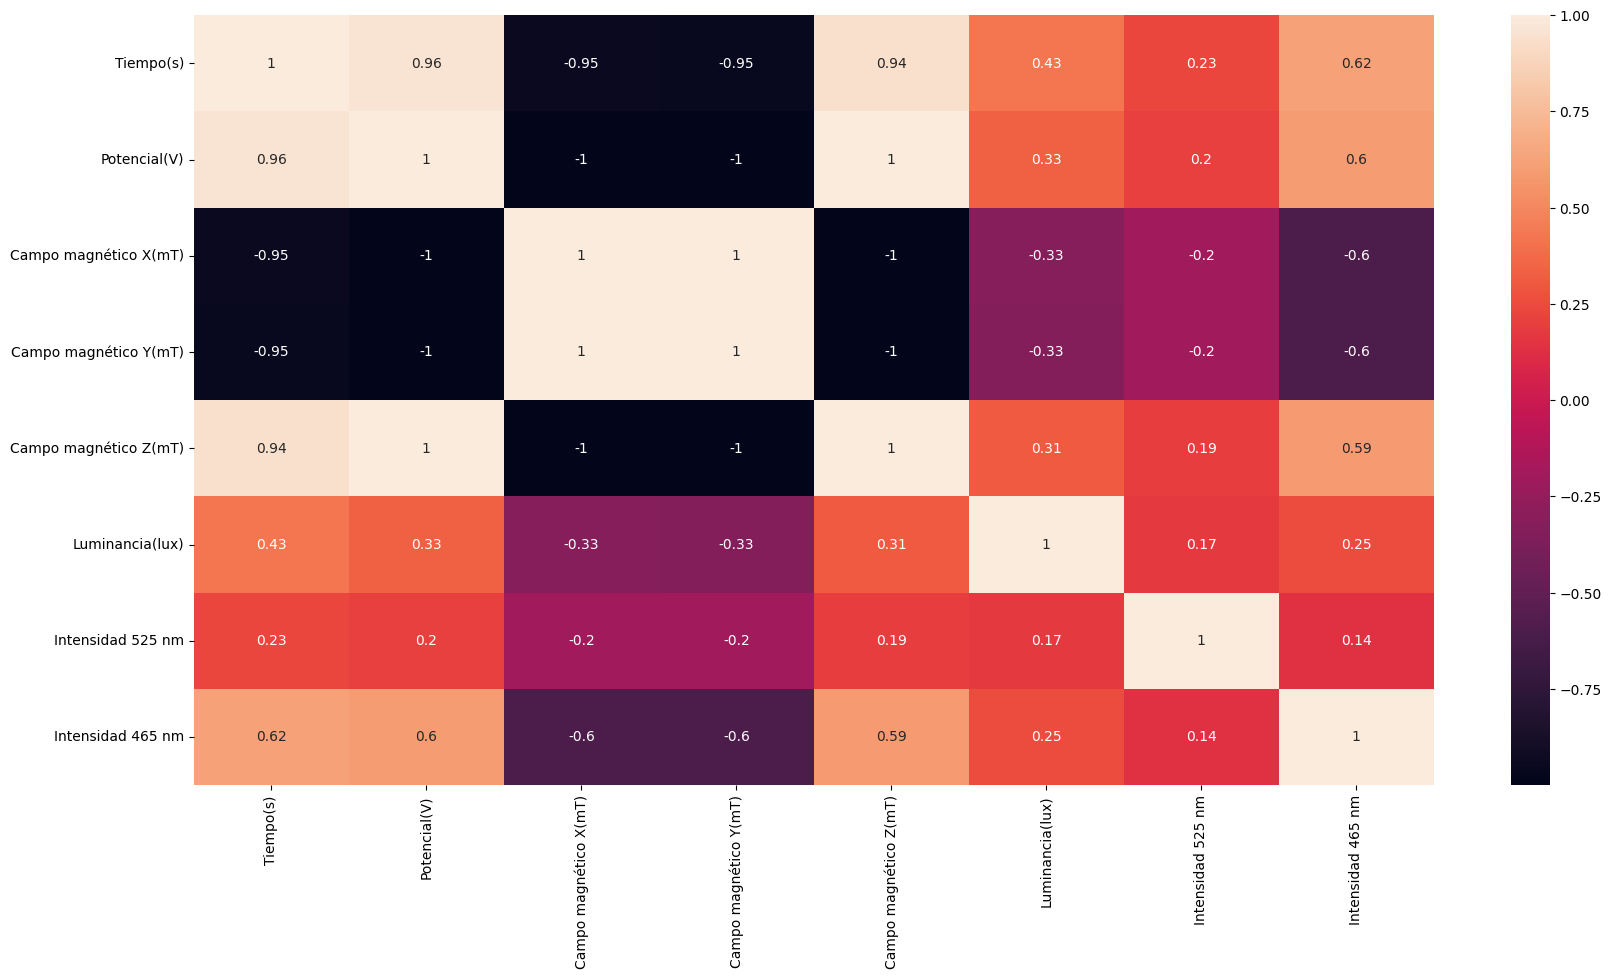

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_03C.corr(), annot=True)

Vamos a realizar un modelo de regresion lineal tanto univariable como multivariable con los diversos datos que nos hayan mostrado un alto valor de correlación.

Error medio cuadrado:
0.3440905835490313
0.10931563448254178


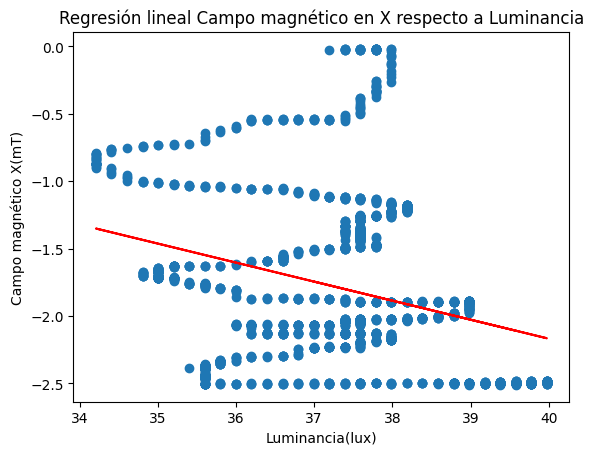

In [ ]:
# División de los datos entre train y test
X = df_03C['Luminancia(lux)']
y = df_03C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.32791141]]
Pendiente:  -0.14116390218217845
Intercepto:  3.477829488903808


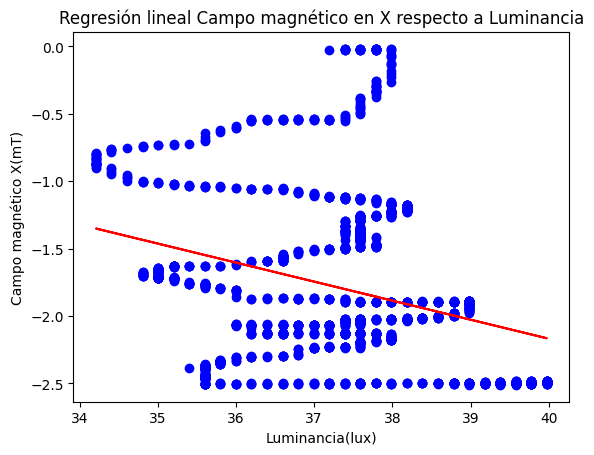

In [ ]:
# División de los datos entre train y test
X = df_03C['Luminancia(lux)']
y = df_03C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético en X respecto a Luminancia")
plt.xlabel("Luminancia(lux)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Ahora realicemos una relacion con los valores de potencial que fue un dato con el que se tuvo mayor control y operatividad al momento de realizar las medidas.

Error medio cuadrado:
0.00022360991205160806
0.9994211819149921


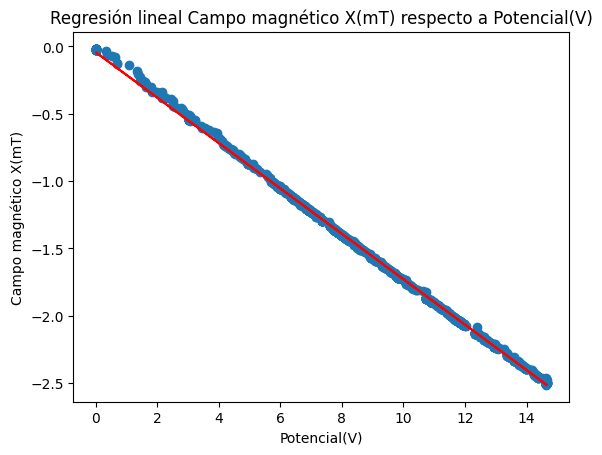

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.00020729]]
Pendiente:  -0.16872000395281117
Intercepto:  -0.04221652393137987


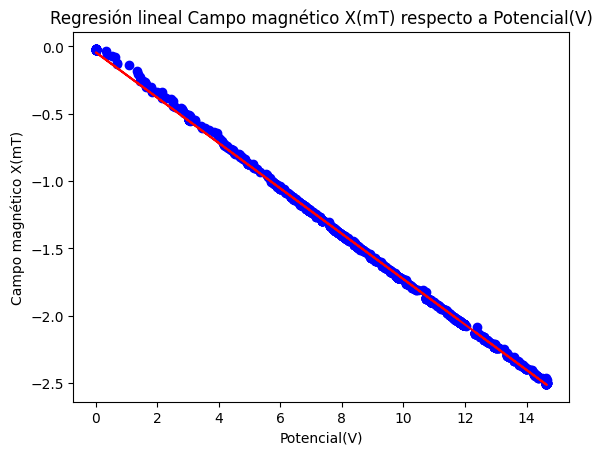

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
1.2217150245461956e-05
0.9995583283328032


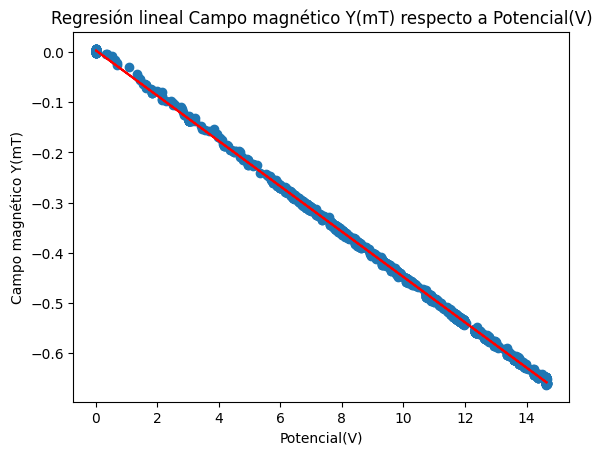

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión manual con offset

Error medio cuadrático: [[1.21867045e-05]]
Pendiente:  -0.04522633281734034
Intercepto:  0.003907644937791943


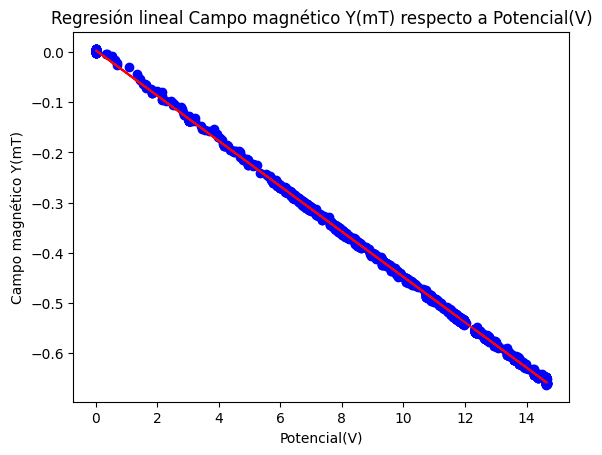

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.0018181690737274123
0.9953633782931518


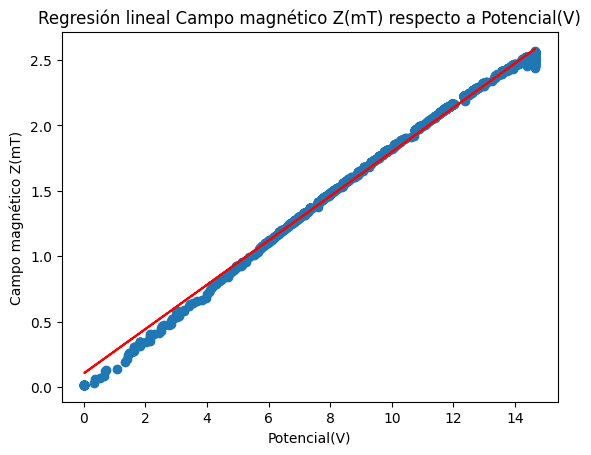

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrático: [[0.0016794]]
Pendiente:  0.1691004444090427
Intercepto:  0.106084765549749


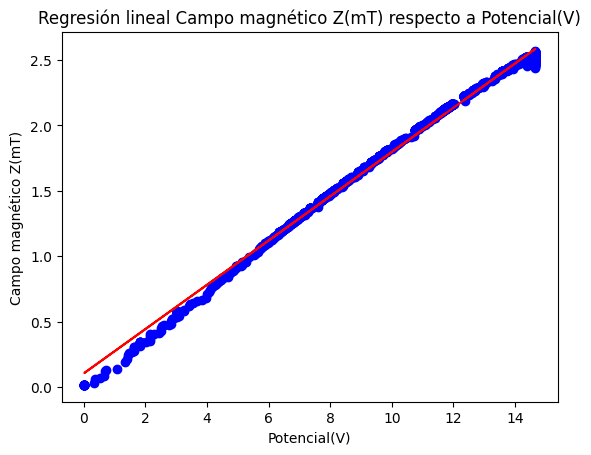

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.07550631724117463
0.04533317806420367


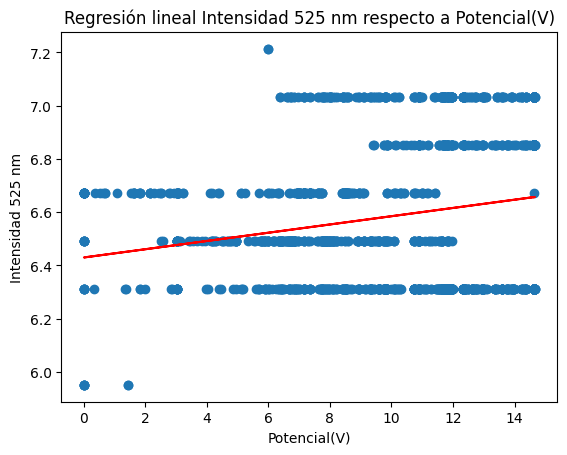

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.07638981]]
Pendiente:  0.01552186085944296
Intercepto:  6.429266118292631


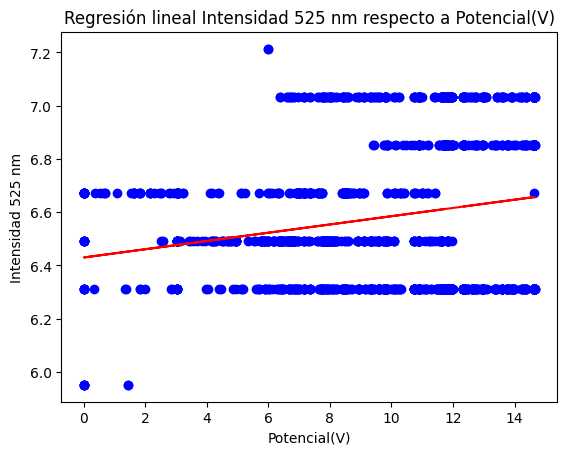

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.7155830043969037
0.33609174766865135


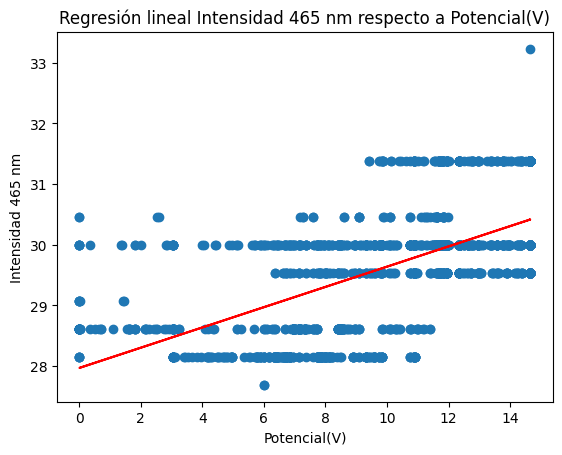

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Error medio cuadrático: [[0.62326152]]
Pendiente:  0.1670985597607384
Intercepto:  27.96823787315003


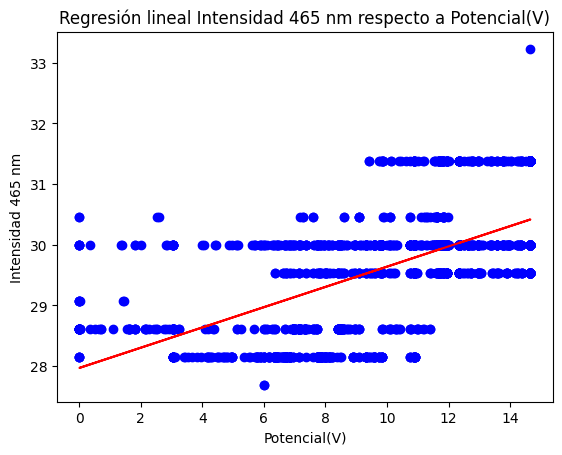

In [ ]:
# División de los datos entre train y test
X = df_03C['Potencial(V)']
y = df_03C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

In [ ]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el atributo shape para observar el tamaño del dataset.
df_04.shape

(2401, 10)

In [ ]:
# Usamos el método info() para obtener información de las columnas del dataset.
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tiempo(s)              2401 non-null   float64
 1   Potencial(V)           2401 non-null   float64
 2   Campo magnético X(mT)  2401 non-null   float64
 3   Campo magnético Y(mT)  2401 non-null   float64
 4   Campo magnético Z(mT)  2401 non-null   float64
 5   Luminancia(lux)        2401 non-null   float64
 6   Intensidad UV          2401 non-null   int64  
 7   Intensidad 615 nm      2401 non-null   int64  
 8   Intensidad 525 nm      2401 non-null   float64
 9   Intensidad 465 nm      2401 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 187.7 KB


In [ ]:
# Usamos el método unique() sobre la columna deseada para verificar cúales son los valores únicos.
print(df_04['Intensidad UV'].unique())
print(df_04['Intensidad 615 nm'].unique())

[0]
[0]


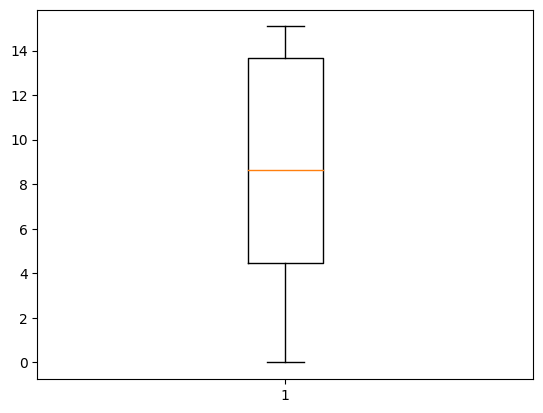

In [ ]:
potential = df_04['Potencial(V)']
plt.boxplot([potential])
plt.show()

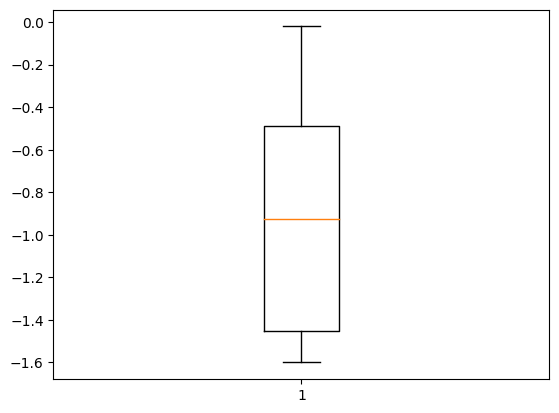

In [ ]:
MX = df_04['Campo magnético X(mT)']
plt.boxplot([MX])
plt.show()

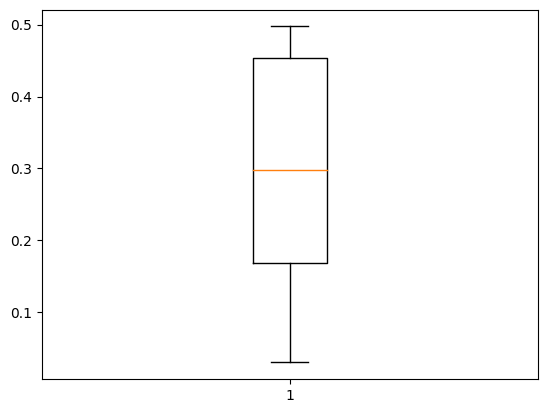

In [ ]:
MY = df_04['Campo magnético Y(mT)']
plt.boxplot([MY])
plt.show()

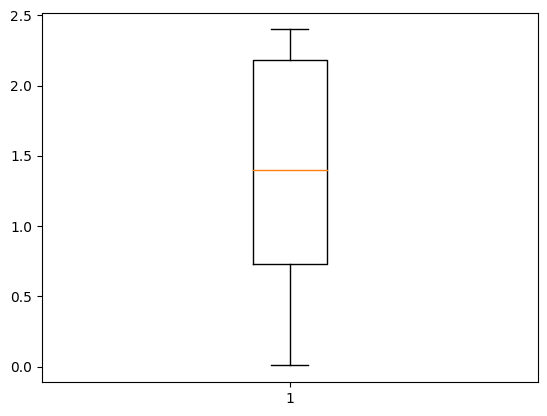

In [ ]:
MZ = df_04['Campo magnético Z(mT)']
plt.boxplot([MZ])
plt.show()

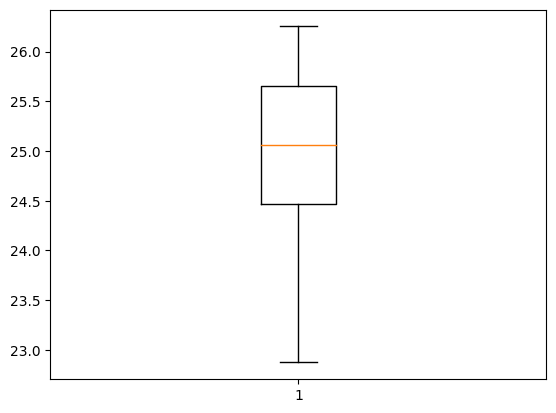

In [ ]:
L = df_04['Luminancia(lux)']
plt.boxplot([L])
plt.show()

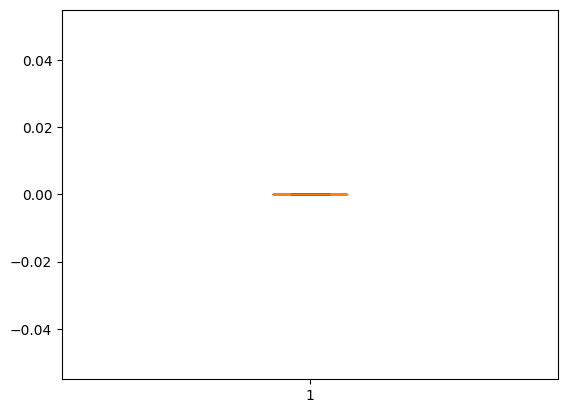

In [ ]:
UV = df_04['Intensidad UV']
plt.boxplot([UV])
plt.show()

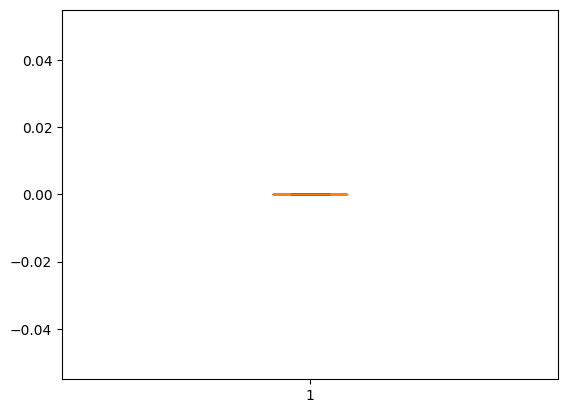

In [ ]:
I1 = df_04['Intensidad 615 nm']
plt.boxplot([I1])
plt.show()

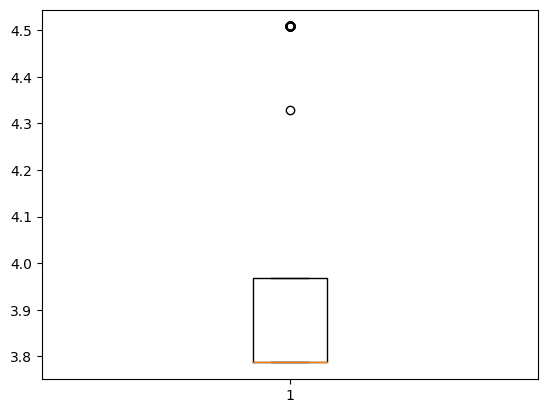

In [ ]:
I2 = df_04['Intensidad 525 nm']
plt.boxplot([I2])
plt.show()

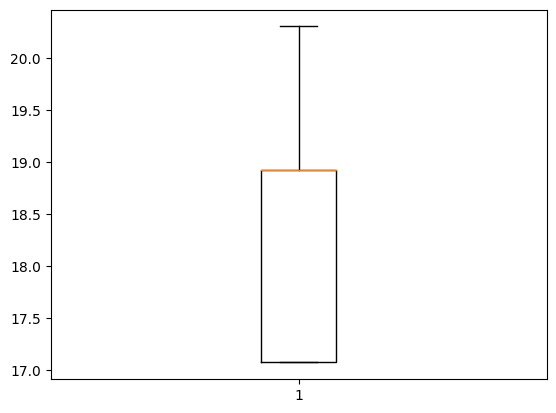

In [ ]:
I3 = df_04['Intensidad 465 nm']
plt.boxplot([I3])
plt.show()

Como los data frames tienen valores cero en las columnas $\mathrm{UV}$ y $615\mathrm{nm}$, pueden ser eliminados ya que no aportan información alguna y como se va a ver más adelante, no tienen correlacion alguna con las demás características.

In [ ]:
df_04C = df_04.drop(columns=['Intensidad UV', 'Intensidad 615 nm'])
df_04C

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  Campo magnético Y(mT)  \
0          0.00     -0.006720              -0.021817               0.031425   
1          0.05     -0.006010              -0.021667               0.030975   
2          0.10     -0.006720              -0.021067               0.031125   
3          0.15     -0.007429              -0.021367               0.030975   
4          0.20     -0.007429              -0.021217               0.031425   
...         ...           ...                    ...                    ...   
2396     119.80     14.963730              -1.580768               0.491625   
2397     119.85     14.964439              -1.576718               0.491775   
2398     119.90     14.965858              -1.579718               0.491775   
2399     119.95     14.965149              -1.579268               0.491325   
2400     120.00     14.965149              -1.577468               0.491025   

      Campo magnético Z(mT)  Luminancia(lux)  Intensidad 525 nm  \
0                   0.01094        24.463142           3.967109   
1                   0.00944        24.264256           3.967109   
2                   0.00899        24.264256           3.967109   
3                   0.00884        24.264256           3.967109   
4                   0.00929        24.264256           3.786786   
...                     ...              ...                ...   
2396                2.37224        25.855352           3.786786   
2397                2.36894        25.656466           3.786786   
2398                2.36954        25.656466           3.786786   
2399                2.37029        25.656466           3.786786   
2400                2.36819        25.656466           4.327755   

      Intensidad 465 nm  
0             17.075481  
1             17.075481  
2             17.075481  
3             17.075481  
4             18.921478  
...                 ...  
2396          18.921478  
2397          18.921478  
2398          18.921478  
2399          18.921478  
2400          20.305979  

[2401 rows x 8 columns]

In [ ]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
df_04C.describe()

Tiempo(s)  Potencial(V)  Campo magnético X(mT)  \
count  2401.000000   2401.000000            2401.000000   
mean     60.000000      8.617146              -0.922636   
std      34.662666      4.865342               0.509305   
min       0.000000     -0.007429              -1.600417   
25%      30.000000      4.474771              -1.454318   
50%      60.000000      8.642134              -0.927968   
75%      90.000000     13.669628              -0.488917   
max     120.000000     15.083569              -0.020617   

       Campo magnético Y(mT)  Campo magnético Z(mT)  Luminancia(lux)  \
count            2401.000000            2401.000000      2401.000000   
mean                0.297170               1.383753        24.931161   
std                 0.150424               0.770588         0.868302   
min                 0.030225               0.008390        22.872044   
25%                 0.169125               0.728840        24.463142   
50%                 0.298275               1.399040        25.059805   
75%                 0.453675               2.186090        25.656466   
max                 0.497475               2.400140        26.253128   

       Intensidad 525 nm  Intensidad 465 nm  
count        2401.000000        2401.000000  
mean            3.858660          18.430763  
std             0.146752           0.803016  
min             3.786786          17.075481  
25%             3.786786          17.075481  
50%             3.786786          18.921478  
75%             3.967109          18.921478  
max             4.508079          20.305979

###Análisis de correlación y regresiones a df_04

<Axes: >

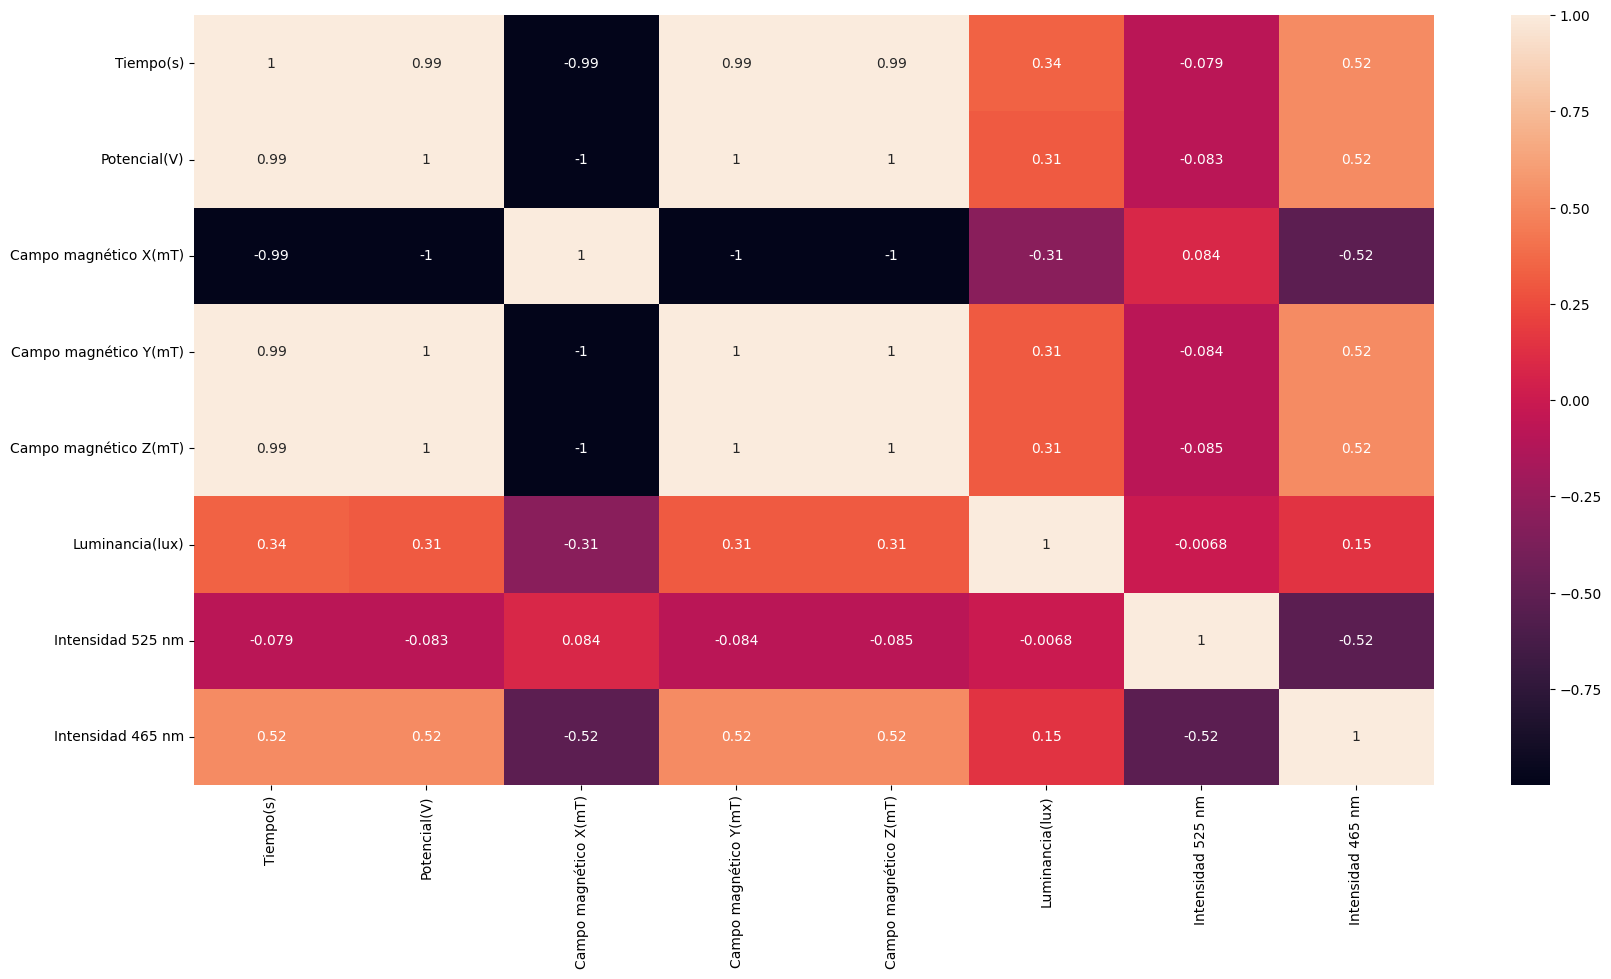

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_04C.corr(), annot=True)

Vamos a realizar un modelo de regresion lineal tanto univariable como multivariable con los diversos datos que nos hayan mostrado un alto valor de correlación.

Ahora realicemos una relacion con los valores de potencial que fue un dato con el que se tuvo mayor control y operatividad al momento de realizar las medidas.

Error medio cuadrado:
6.228348654609545e-05
0.9997560855365653


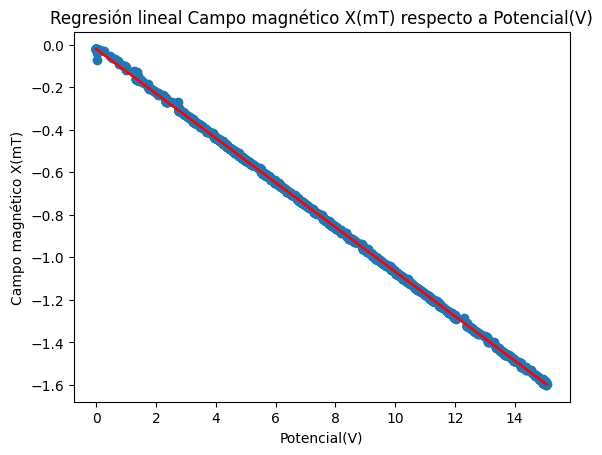

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal con offset


Error medio cuadrático: [[1.9002211e-05]]
Pendiente:  -0.10466040741628141
Intercepto:  -0.020846535703987534


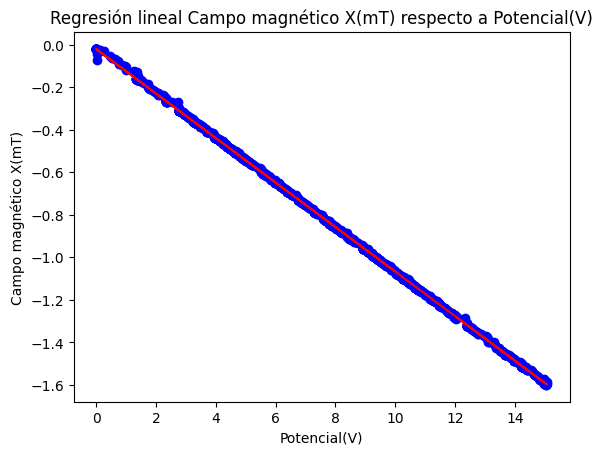

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Campo magnético X(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético X(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético X(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
5.171900967060231e-06
0.9997679343766229


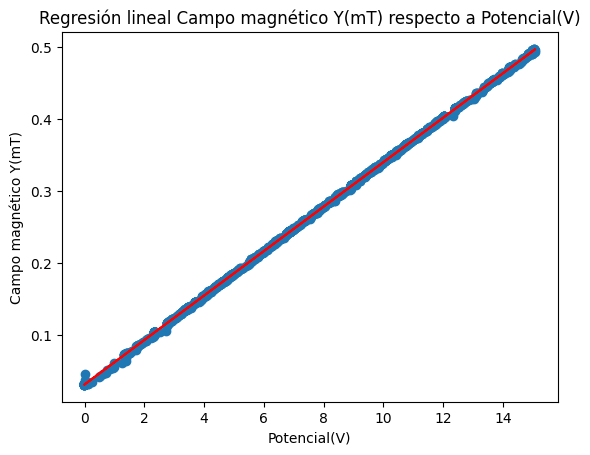

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[1.48962594e-06]]
Pendiente:  0.03090971284372883
Intercepto:  0.030836531842254544


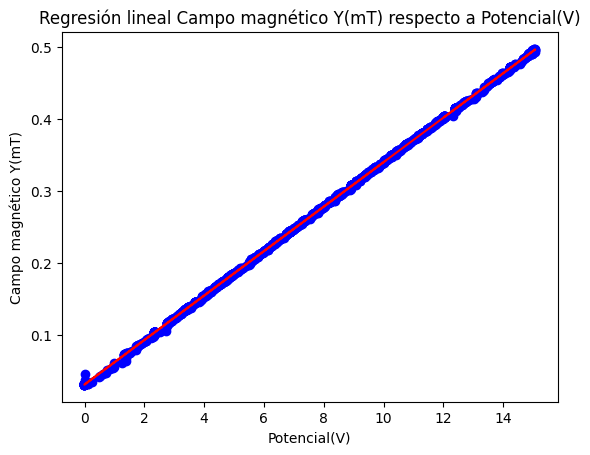

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Campo magnético Y(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético Y(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Y(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.00022502547993123997
0.9996152215358758


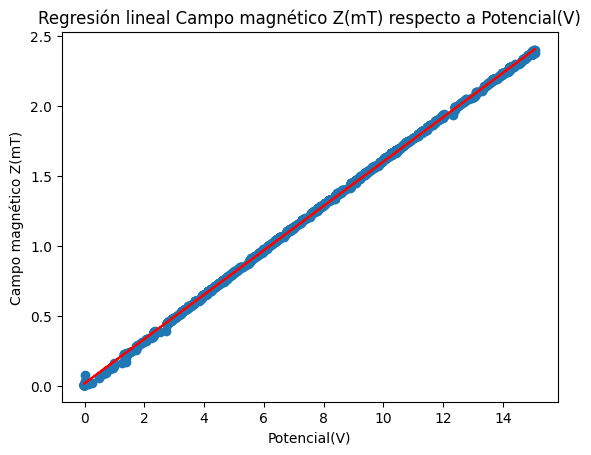

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.00011549]]
Pendiente:  0.1583348181658656
Intercepto:  0.01944275801472095


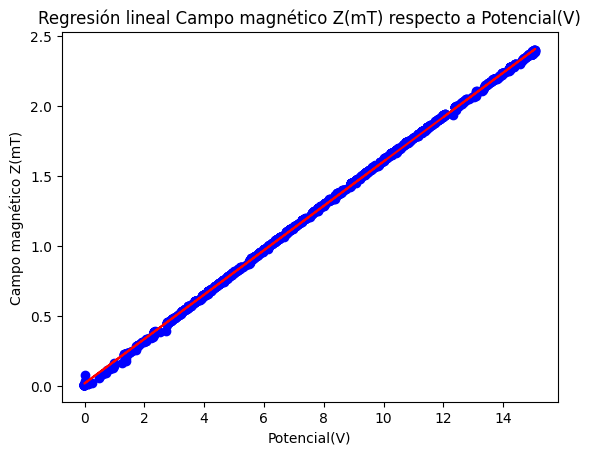

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Campo magnético Z(mT)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Campo magnético Z(mT) respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Campo magnético Z(mT)")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.019738400231335787
0.01210930432275581


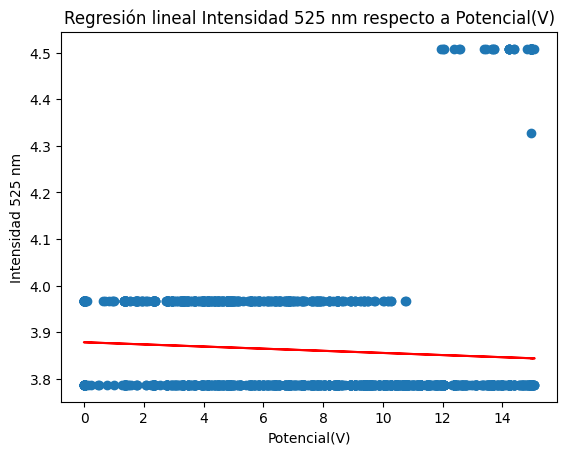

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.0217901]]
Pendiente:  -0.002289434998192119
Intercepto:  3.8783324996505435


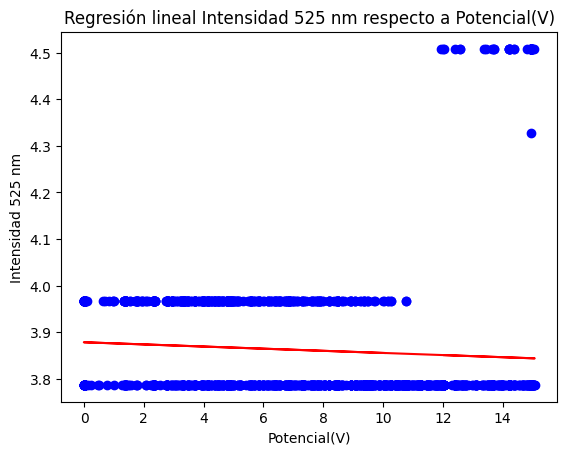

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Intensidad 525 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 525 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 525 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])

Error medio cuadrado:
0.5037361750369188
0.2520146421589968


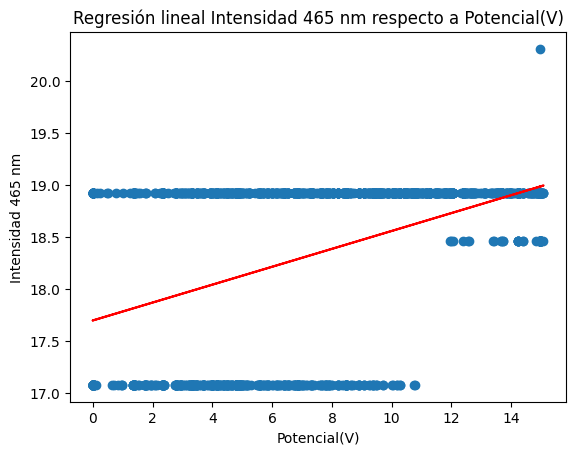

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, Y_train)
Prediccion = model.predict(X_test)

# Graficamos los datos estandarizados
plt.scatter(X_train, Y_train)

# Graficamos la linea de regresion ajustada
plt.plot(X_test, Prediccion, color='red', label='Regresion lineal')
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")

print("Error medio cuadrado:")
print(mean_squared_error(Y_test, Prediccion))

# Calcular el coeficiente de determinación (R^2)
print(r2_score(Y_test, Prediccion))

Regresión lineal manual con offset

Error medio cuadrático: [[0.46120124]]
Pendiente:  0.08601798184508791
Intercepto:  17.695641837034763


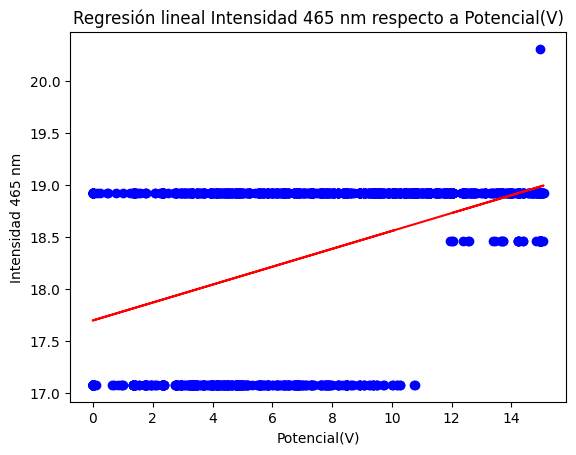

In [ ]:
# División de los datos entre train y test
X = df_04C['Potencial(V)']
y = df_04C['Intensidad 465 nm']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, shuffle= True)
X_train1 = np.array(X_train).reshape(-1, 1)
X_test1 = np.array(X_test).reshape(-1, 1)
Y_train = np.array(Y_train)
Matriz_Ytrain=np.full((1920,1), Y_train.reshape(-1,1))
Matriz_YtrainT=np.transpose(Matriz_Ytrain)


#Obteniendo la matriz X
P = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
PT = np.transpose(P)

# Dibujando los datos de train
plt.title("Regresión lineal Intensidad 465 nm respecto a Potencial(V)")
plt.xlabel("Potencial(V)")
plt.ylabel("Intensidad 465 nm")
plt.scatter(X_train, Y_train, color='blue', label ='Datos train')

#Calcular el omega
w = (Matriz_YtrainT @ P) @ np.linalg.inv(PT @ P)

#Dibujando la recta
htrain= w[0,1] * X_train + w[0,0]
plt.plot(X_train, htrain, color="red", label="Regresión lineal")

#Error medio cuadrático
J=(np.transpose(P @ np.transpose(w) - Matriz_Ytrain) @ (P @ np.transpose(w) - Matriz_Ytrain) ) / len(Y_train)
print("Error medio cuadrático:", J)
print("Pendiente: ", w[0,1])
print("Intercepto: ", w[0,0])